In [4]:
import numpy as np
x = []
y = []
T = 1400
lr = 0.02/T

def readFile(fileName, yval):
    f = open(fileName)
    global x
    global y
    for line in f.readlines():
        temp = []
        for word in line.split():
            temp.append(int(word))
        x.append(temp)
        y.append(yval)
        
readFile("hw5_train3.txt", 0);
readFile("hw5_train5.txt", 1);
print(len(y))
print(len(x))
print(sum(y))

1400
1400
700


In [5]:
wt = np.zeros(64)

In [6]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [7]:
import numpy as np
def loglikelihood(x, y, w):
    sum = 0
    for i in range(0, len(x)):
        if(y[i]==0):
            sum += math.log(sigmoid(-1*np.dot(w, x[i])))
        elif(y[i]==1):
            sum += math.log(sigmoid(np.dot(w, x[i])))
    return sum

In [8]:
def derivative(x, y, w):
    res = np.zeros(64)
    for i in range(0, len(x)):
        res += (y[i]-sigmoid(np.dot(w, x[i])))*np.array(x[i])
    return res

In [19]:
def hessian(x, w):
    hess = np.zeros((64, 64))
    for i in range(0, len(x)):
        hess -= (np.transpose(x[i])*x[i])
        hess = sigmoid(np.dot(w, x[i]))*sigmoid(-1*np.dot(w, x[i]))*hess
    return hess

In [20]:
plotx = []
ploty = []
loopcount = 0;
plotx.append(loopcount)
ploty.append(loglikelihood(x,y,wt))
while(True):
    der = derivative(x, y, wt)
    hess = hessian(x, wt)
    hessianinv = np.linalg.inv(hess)
    ll1 = loglikelihood(x,y,wt)
    loopcount += 1
    wt = wt - hessianinv*der
    ll2 = loglikelihood(x,y,wt)
    plotx.append(loopcount)
    ploty.append(ll2)
    print(ll2)
    if(abs(ll1-ll2)<math.pow(10, -6) or ll2<ll1):
        break
print("Converged")

LinAlgError: Singular matrix

In [8]:
plotx = []
ploty = []
loopcount = 0;
plotx.append(loopcount)
ploty.append(loglikelihood(x,y,wt))
lr = lr*10
print("Starting gradient ascent")
while(True):
    der = derivative(x, y, wt)
    ll1 = loglikelihood(x,y,wt)
    loopcount += 1
    wt = wt + lr*der
    ll2 = loglikelihood(x,y,wt)
    plotx.append(loopcount)
    ploty.append(ll2)
    print(ll2)
    if(abs(ll1-ll2)<math.pow(10, -6) or ll2<ll1):
        break
print("Converged")

Starting gradient ascent
-911.2555585958505
-861.3892131034522
-818.0576089330029
-780.1930216186153
-746.9022571208815
-717.4464159002488
-691.2189452984484
-667.7234100124075
-646.553359173425
-627.3751462425641
-609.9137609982712
-593.9413751304311
-579.2681837473882
-565.7351223662588
-553.2080852540711
-541.5733320010654
-530.7338290560286
-520.6063253521655
-511.11900448066746
-502.2095905721891
-493.82381233041724
-485.9141508861941
-478.43881355778313
-471.3608882713323
-464.64764316954665
-458.26994348777004
-452.2017636244728
-446.4197768763448
-440.90300885071105
-435.6325433414594
-430.591271635302
-425.7636779372642
-421.1356549703705
-416.69434489308236
-412.42800154938345
-408.32587076702134
-404.37808598526783
-400.575576952457
-396.9099896074825
-393.3736155652046
-389.9593298769302
-386.6605359442327
-383.4711166358622
-380.38539079995473
-377.39807448258813
-374.5042462631627
-371.6993162006332
-368.9789979549698
-366.3392837077805
-363.7764215564321
-361.28689509898

-180.1405501992473
-180.10931478782445
-180.07813868173503
-180.04702170109073
-180.01596366676367
-179.98496440038303
-179.9540237243287
-179.92314146173075
-179.8923174364627
-179.86155147313795
-179.83084339710712
-179.80019303445178
-179.7696002119834
-179.7390647572359
-179.70858649846585
-179.67816526464466
-179.64780088545757
-179.61749319129882
-179.58724201326706
-179.55704718316244
-179.52690853348366
-179.496825897423
-179.46679910886215
-179.43682800237028
-179.4069124131999
-179.3770521772813
-179.34724713122128
-179.31749711230054
-179.28780195846488
-179.25816150832722
-179.2285756011629
-179.19904407690356
-179.16956677613584
-179.14014354009765
-179.11077421067577
-179.08145863039923
-179.05219664243978
-179.02298809060562
-178.99383281934044
-178.9647306737176
-178.93568149943872
-178.9066851428307
-178.8777414508399
-178.84885027103124
-178.8200114515854
-178.79122484129346
-178.76249028955536
-178.7338076463765
-178.70517676236346
-178.67659748872217
-178.6480696772

-170.73762539375397
-170.72135796645375
-170.70511169485584
-170.68888653603526
-170.67268244718645
-170.65649938562314
-170.6403373087807
-170.62419617421176
-170.60807593958862
-170.5919765627011
-170.57589800145803
-170.55984021388446
-170.5438031581241
-170.52778679243488
-170.51179107519278
-170.49581596488898
-170.47986142012957
-170.46392739963704
-170.4480138622462
-170.432120766908
-170.41624807268605
-170.40039573875706
-170.38456372441198
-170.3687519890528
-170.35296049219406
-170.33718919346245
-170.32143805259471
-170.30570702944104
-170.28999608395964
-170.27430517621954
-170.25863426640026
-170.24298331478994
-170.2273522817857
-170.21174112789402
-170.19614981372862
-170.18057830001132
-170.16502654757153
-170.14949451734637
-170.13398217037852
-170.11848946781691
-170.10301637091732
-170.08756284104123
-170.07212883965434
-170.05671432832776
-170.04131926873654
-170.0259436226608
-170.01058735198424
-169.99525041869265
-169.97993278487652
-169.96463441272743
-169.9493

-165.3187625379768
-165.30871485964371
-165.29867722008814
-165.288649603926
-165.27863199580688
-165.2686243804124
-165.25862674245556
-165.2486390666826
-165.2386613378709
-165.2286935408295
-165.21873566040009
-165.20878768145533
-165.1988495888991
-165.18892136766772
-165.17900300272848
-165.16909447907958
-165.15919578175175
-165.14930689580626
-165.13942780633423
-165.12955849845974
-165.11969895733594
-165.1098491681494
-165.10000911611456
-165.09017878647788
-165.08035816451715
-165.07054723553875
-165.06074598488132
-165.05095439791378
-165.04117246003392
-165.03140015667043
-165.02163747328294
-165.01188439535957
-165.00214090841976
-164.9924069980117
-164.98268264971452
-164.97296784913638
-164.9632625819151
-164.95356683371833
-164.94388059024297
-164.9342038372154
-164.92453656039086
-164.91487874555526
-164.90523037852162
-164.89559144513444
-164.88596193126497
-164.87634182281505
-164.86673110571434
-164.85712976592225
-164.84753778942547
-164.8379551622413
-164.82838187

-161.8478601496092
-161.84096709346744
-161.83407968823317
-161.82719792688385
-161.82032180241066
-161.8134513078152
-161.8065864361111
-161.79972718032454
-161.7928735334921
-161.78602548866291
-161.77918303889774
-161.77234617726975
-161.76551489686273
-161.75868919077212
-161.7518690521055
-161.74505447398158
-161.73824544953143
-161.73144197189697
-161.7246440342313
-161.71785162970036
-161.71106475148025
-161.70428339275855
-161.697507546735
-161.6907372066206
-161.6839723656377
-161.67721301701917
-161.67045915400973
-161.66371076986655
-161.65696785785593
-161.65023041125687
-161.6434984233596
-161.63677188746468
-161.63005079688455
-161.62333514494233
-161.6166249249731
-161.6099201303222
-161.60322075434604
-161.59652679041255
-161.58983823190053
-161.58315507220019
-161.5764773047117
-161.56980492284742
-161.56313792002976
-161.55647628969166
-161.54982002527836
-161.5431691202453
-161.5365235680588
-161.52988336219568
-161.5232484961436
-161.5166189634012
-161.5099947574779

-159.38682984955867
-159.3818040340131
-159.3767817266787
-159.37176292387815
-159.36674762193974
-159.36173581719632
-159.35672750598746
-159.35172268465587
-159.34672134955136
-159.34172349702726
-159.3367291234436
-159.33173822516352
-159.32675079855724
-159.32176684
-159.31678634587092
-159.31180931255489
-159.30683573644265
-159.30186561392787
-159.29689894141234
-159.29193571530044
-159.28697593200266
-159.28201958793463
-159.27706667951608
-159.27211720317337
-159.26717115533688
-159.26222853244204
-159.25728933092938
-159.25235354724452
-159.2474211778382
-159.24249221916523
-159.23756666768756
-159.2326445198695
-159.22772577218169
-159.2228104211003
-159.21789846310472
-159.21298989468104
-159.20808471231962
-159.20318291251493
-159.19828449176714
-159.1933894465817
-159.18849777346836
-159.1836094689417
-159.17872452952076
-159.17384295173147
-159.16896473210193
-159.1640898671664
-159.1592183534648
-159.15435018754064
-159.1494853659423
-159.14462388522335
-159.139765741942

-157.55304659330713
-157.54921983663706
-157.54539541362703
-157.54157332215811
-157.5377535601126
-157.53393612537693
-157.53012101583977
-157.52630822939216
-157.52249776392773
-157.51868961734283
-157.51488378753598
-157.51108027240886
-157.5072790698655
-157.50348017781266
-157.49968359415828
-157.49588931681544
-157.4920973436971
-157.4883076727211
-157.48452030180542
-157.4807352288729
-157.47695245184792
-157.47317196865697
-157.469393777229
-157.4656178754964
-157.46184426139405
-157.4580729328583
-157.45430388782873
-157.45053712424718
-157.44677264005827
-157.44301043320877
-157.43925050164881
-157.4354928433294
-157.43173745620564
-157.42798433823452
-157.42423348737486
-157.42048490158888
-157.4167385788408
-157.41299451709762
-157.4092527143283
-157.40551316850488
-157.40177587760144
-157.39804083959444
-157.39430805246369
-157.39057751418977
-157.38684922275732
-157.38312317615268
-157.3793993723643
-157.37567780938386
-157.37195848520437
-157.36824139782325
-157.36452654

-155.01663902533355
-155.01420766024833
-155.01177748860204
-155.00934850953684
-155.00692072219363
-155.00449412571467
-155.00206871924254
-154.999644501921
-154.99722147289634
-154.99479963131213
-154.99237897631662
-154.989959507056
-154.98754122267846
-154.9851241223326
-154.9827082051685
-154.98029347033668
-154.9778799169884
-154.97546754427586
-154.9730563513516
-154.97064633736952
-154.9682375014846
-154.9658298428523
-154.963423360628
-154.96101805396938
-154.95861392203474
-154.95621096398153
-154.95380917896983
-154.95140856616018
-154.94900912471297
-154.94661085379113
-154.94421375255598
-154.94181782017233
-154.93942305580367
-154.93702945861472
-154.9346370277722
-154.93224576244236
-154.92985566179294
-154.9274667249926
-154.92507895120963
-154.92269233961403
-154.92030688937643
-154.91792259966886
-154.9155394696632
-154.91315749853237
-154.91077668545066
-154.90839702959198
-154.90601853013268
-154.9036411862488
-154.90126499711604
-154.89888996191394
-154.89651607981

-154.0968997599821
-154.0949003648543
-154.09290186631935
-154.09090426379194
-154.088907556687
-154.086911744419
-154.08491682640496
-154.08292280206055
-154.08092967080302
-154.07893743204977
-154.07694608521848
-154.07495562972753
-154.07296606499625
-154.07097739044335
-154.0689896054898
-154.06700270955508
-154.06501670206097
-154.0630315824281
-154.06104735007898
-154.0590640044363
-154.05708154492208
-154.0550999709612
-154.05311928197622
-154.05113947739244
-154.04916055663463
-154.04718251912817
-154.04520536429948
-154.0432290915743
-154.04125370038028
-154.03927919014498
-154.03730556029535
-154.035332810261
-154.03336093947
-154.03138994735272
-154.02941983333886
-154.02745059685824
-154.02548223734243
-154.0235147542227
-154.02154814693097
-154.01958241489973
-154.01761755756183
-154.0156535743508
-154.01369046470023
-154.0117282280452
-154.00976686382023
-154.00780637146056
-154.0058467504017
-154.00388800008108
-154.00193011993449
-153.9999731093996
-153.99801696791477
-

-153.32946474498576
-153.32779601886932
-153.32612798238063
-153.32446063510793
-153.32279397663987
-153.3211280065642
-153.31946272446922
-153.31779812994486
-153.31613422258067
-153.31447100196633
-153.3128084676908
-153.31114661934586
-153.30948545652166
-153.30782497880932
-153.30616518580013
-153.30450607708613
-153.3028476522586
-153.30118991091058
-153.2995328526349
-153.29787647702426
-153.29622078367183
-153.29456577217152
-153.29291144211732
-153.2912577931037
-153.28960482472425
-153.2879525365754
-153.28630092825188
-153.28464999934852
-153.28299974946233
-153.28135017818877
-153.2797012851252
-153.2780530698677
-153.27640553201343
-153.27475867116115
-153.2731124869069
-153.27146697885016
-153.2698221465888
-153.26817798972243
-153.26653450784906
-153.26489170056865
-153.263249567481
-153.261608108186
-153.25996732228407
-153.25832720937603
-153.25668776906303
-153.25504900094606
-153.25341090462686
-153.25177347970748
-153.25013672579033
-153.24850064247778
-153.246865229

-152.69026711050557
-152.68885324060403
-152.68743991377917
-152.68602712973117
-152.68461488816084
-152.68320318876928
-152.68179203125737
-152.68038141532622
-152.67897134067746
-152.6775618070129
-152.6761528140345
-152.67474436144397
-152.6733364489447
-152.67192907623794
-152.67052224302756
-152.66911594901606
-152.66771019390703
-152.66630497740363
-152.66490029920968
-152.66349615902965
-152.66209255656636
-152.6606894915255
-152.65928696361078
-152.65788497252746
-152.65648351797998
-152.6550825996743
-152.6536822173149
-152.65228237060845
-152.6508830592601
-152.6494842829758
-152.64808604146273
-152.64668833442656
-152.64529116157456
-152.6438945226129
-152.64249841724953
-152.64110284519148
-152.63970780614613
-152.63831329982168
-152.63691932592576
-152.6355258841669
-152.63413297425325
-152.63274059589375
-152.63134874879677
-152.6299574326721
-152.6285666472283
-152.6271763921752
-152.62578666722277
-152.6243974720802
-152.6230088064584
-152.6216206700673
-152.62023306261

-152.14323646559222
-152.1420259226847
-152.14081581463938
-152.13960614123346
-152.1383969022448
-152.13718809745026
-152.135979726628
-152.13477178955583
-152.13356428601173
-152.13235721577385
-152.13115057862055
-152.12994437433008
-152.1287386026816
-152.1275332634533
-152.12632835642452
-152.12512388137358
-152.12391983808098
-152.12271622632468
-152.12151304588548
-152.12031029654207
-152.1191079780744
-152.11790609026338
-152.11670463288797
-152.11550360572892
-152.11430300856682
-152.11310284118196
-152.11190310335522
-152.11070379486748
-152.10950491549923
-152.10830646503268
-152.10710844324805
-152.10591084992774
-152.10471368485258
-152.1035169478048
-152.10232063856614
-152.10112475691875
-152.09992930264494
-152.09873427552657
-152.0975396753464
-152.09634550188727
-152.09515175493198
-152.09395843426347
-152.0927655396645
-152.09157307091849
-152.09038102780872
-152.0891894101189
-152.08799821763267
-152.08680745013382
-152.08561710740668
-152.08442718923456
-152.083237

-151.67156869950938
-151.67052255706255
-151.6694767680341
-151.6684313322559
-151.66738624955818
-151.66634151977217
-151.66529714272968
-151.66425311826194
-151.66320944620074
-151.66216612637746
-151.66112315862358
-151.66008054277174
-151.65903827865364
-151.6579963661013
-151.65695480494676
-151.6559135950225
-151.65487273616085
-151.65383222819463
-151.65279207095617
-151.6517522642783
-151.6507128079936
-151.64967370193534
-151.64863494593692
-151.64759653983026
-151.64655848345026
-151.64552077662907
-151.64448341920024
-151.64344641099808
-151.64240975185547
-151.64137344160739
-151.6403374800861
-151.63930186712707
-151.63826660256342
-151.63723168622977
-151.63619711796053
-151.6351628975898
-151.63412902495264
-151.6330954998832
-151.63206232221665
-151.6310294917869
-151.62999700842997
-151.6289648719805
-151.6279330822735
-151.62690163914453
-151.6258705424286
-151.6248397919614
-151.62380938757846
-151.62277932911573
-151.62174961640844
-151.62072024929273
-151.619691227

-151.2640792883052
-151.26316705710093
-151.262255117247
-151.26134346861252
-151.26043211106725
-151.25952104447987
-151.25861026872082
-151.25769978365904
-151.25678958916478
-151.2558796851075
-151.25497007135692
-151.2540607477837
-151.25315171425703
-151.25224297064727
-151.25133451682564
-151.25042635266064
-151.24951847802362
-151.24861089278477
-151.24770359681503
-151.2467965899841
-151.24588987216364
-151.24498344322302
-151.24407730303446
-151.24317145146782
-151.2422658883945
-151.24136061368586
-151.2404556272123
-151.23955092884526
-151.23864651845616
-151.23774239591617
-151.23683856109682
-151.23593501386927
-151.23503175410576
-151.23412878167701
-151.23322609645564
-151.2323236983131
-151.231421587121
-151.23051976275156
-151.22961822507634
-151.228716973968
-151.22781600929878
-151.22691533094056
-151.2260149387659
-151.22511483264702
-151.22421501245643
-151.22331547806616
-151.22241622934988
-151.22151726617997
-151.2206185884288
-151.2197201959697
-151.21882208867

-150.90587056188477
-150.90506984356963
-150.9042693680324
-150.90346913516953
-150.90266914487952
-150.90186939705941
-150.90106989160645
-150.9002706284195
-150.89947160739507
-150.89867282843133
-150.89787429142683
-150.8970759962786
-150.89627794288515
-150.8954801311446
-150.8946825609552
-150.8938852322138
-150.89308814481993
-150.89229129867167
-150.89149469366723
-150.89069832970495
-150.88990220668296
-150.88910632450018
-150.88831068305487
-150.88751528224614
-150.88672012197242
-150.8859252021319
-150.8851305226238
-150.88433608334742
-150.88354188420118
-150.88274792508366
-150.88195420589457
-150.88116072653233
-150.8803674868968
-150.8795744868863
-150.87878172640126
-150.87798920533973
-150.87719692360147
-150.87640488108613
-150.87561307769292
-150.87482151332142
-150.87403018787097
-150.87323910124192
-150.87244825333337
-150.87165764404523
-150.87086727327699
-150.87007714092894
-150.86928724690068
-150.86849759109273
-150.86770817340442
-150.86691899373588
-150.86613

-150.58832929301204
-150.5876225853708
-150.5869160818896
-150.58620978248746
-150.58550368708248
-150.58479779559315
-150.58409210793872
-150.5833866240373
-150.58268134380825
-150.58197626716964
-150.58127139404115
-150.58056672434142
-150.57986225798916
-150.57915799490306
-150.57845393500298
-150.57775007820698
-150.57704642443534
-150.57634297360613
-150.57563972563966
-150.57493668045385
-150.57423383796885
-150.57353119810418
-150.57282876077798
-150.57212652591113
-150.57142449342214
-150.57072266323095
-150.57002103525687
-150.5693196094195
-150.56861838563844
-150.56791736383386
-150.56721654392487
-150.56651592583142
-150.56581550947274
-150.5651152947699
-150.56441528164123
-150.56371547000802
-150.56301585978966
-150.56231645090628
-150.56161724327723
-150.56091823682408
-150.5602194314653
-150.5595208271224
-150.55882242371473
-150.5581242211625
-150.55742621938683
-150.55672841830722
-150.5560308178447
-150.55533341791923
-150.55463621845158
-150.55393921936184
-150.5532

-150.30790220214837
-150.30727474318414
-150.30664745757943
-150.30602034526797
-150.30539340618412
-150.30476664026247
-150.30414004743838
-150.30351362764526
-150.3028873808184
-150.3022613068924
-150.30163540580193
-150.301009677481
-150.30038412186505
-150.29975873888904
-150.29913352848726
-150.29850849059486
-150.29788362514645
-150.29725893207737
-150.2966344113221
-150.29601006281578
-150.29538588649345
-150.29476188228992
-150.2941380501408
-150.29351438998097
-150.29289090174498
-150.29226758536836
-150.2916444407867
-150.29102146793485
-150.29039866674808
-150.2897760371615
-150.2891535791106
-150.28853129253127
-150.28790917735802
-150.28728723352717
-150.28666546097338
-150.28604385963214
-150.28542242943965
-150.28480117033126
-150.2841800822421
-150.28355916510802
-150.28293841886477
-150.2823178434482
-150.28169743879351
-150.28107720483638
-150.28045714151355
-150.27983724876
-150.27921752651153
-150.27859797470495
-150.27797859327487
-150.2773593821578
-150.2767403412

-150.06054053284032
-150.05998004896722
-150.05941971373923
-150.0588595271029
-150.058299489004
-150.05773959939017
-150.05717985820726
-150.05662026540256
-150.0560608209223
-150.0555015247131
-150.05494237672187
-150.054383376895
-150.05382452518012
-150.05326582152276
-150.05270726587102
-150.05214885817108
-150.05159059836953
-150.05103248641404
-150.05047452225102
-150.0499167058273
-150.04935903709006
-150.04880151598653
-150.04824414246337
-150.04768691646728
-150.04712983794633
-150.04657290684705
-150.04601612311637
-150.0454594867018
-150.04490299755028
-150.04434665560933
-150.0437904608256
-150.0432344131467
-150.0426785125198
-150.0421227588923
-150.04156715221134
-150.04101169242486
-150.04045637947945
-150.03990121332293
-150.03934619390245
-150.03879132116577
-150.0382365950604
-150.03768201553314
-150.03712758253207
-150.03657329600486
-150.0360191558994
-150.03546516216198
-150.03491131474138
-150.03435761358483
-150.0338040586404
-150.03325064985486
-150.03269738717

-149.83708968362725
-149.83658734871645
-149.83608514202086
-149.8355830634959
-149.83508111309817
-149.83457929078355
-149.83407759650822
-149.83357603022836
-149.8330745918996
-149.83257328147877
-149.83207209892203
-149.83157104418467
-149.83107011722393
-149.83056931799564
-149.83006864645589
-149.8295681025618
-149.82906768626873
-149.82856739753333
-149.828067236312
-149.8275672025607
-149.82706729623638
-149.8265675172954
-149.82606786569366
-149.82556834138802
-149.82506894433513
-149.8245696744905
-149.8240705318117
-149.82357151625502
-149.82307262777692
-149.8225738663338
-149.82207523188174
-149.8215767243784
-149.8210783437799
-149.82058009004274
-149.82008196312367
-149.81958396297935
-149.8190860895668
-149.8185883428422
-149.81809072276243
-149.81759322928448
-149.81709586236522
-149.8165986219608
-149.81610150802902
-149.81560452052577
-149.81510765940834
-149.81461092463366
-149.8141143161579
-149.8136178339395
-149.81312147793366
-149.81262524809827
-149.812129144390

-149.63823309334745
-149.63778063718786
-149.63732829251526
-149.63687605929258
-149.6364239374834
-149.63597192705154
-149.6355200279594
-149.63506824017134
-149.63461656365106
-149.6341649983614
-149.63371354426658
-149.6332622013299
-149.63281096951516
-149.63235984878568
-149.6319088391053
-149.63145794043717
-149.63100715274604
-149.6305564759946
-149.63010591014688
-149.62965545516627
-149.62920511101703
-149.628754877663
-149.62830475506735
-149.6278547431939
-149.62740484200677
-149.6269550514697
-149.6265053715464
-149.62605580220085
-149.6256063433966
-149.62515699509794
-149.6247077572685
-149.62425862987214
-149.62380961287263
-149.62336070623456
-149.6229119099211
-149.62246322389657
-149.62201464812458
-149.62156618257026
-149.62111782719583
-149.62066958196695
-149.6202214468466
-149.61977342179947
-149.61932550678938
-149.6188777017804
-149.61843000673616
-149.61798242162175
-149.6175349464009
-149.61708758103723
-149.6166403254957
-149.61619317973953
-149.6157461437337

-149.45594845303924
-149.45554017877137
-149.45513200181216
-149.45472392213122
-149.4543159396979
-149.45390805448184
-149.45350026645272
-149.45309257557975
-149.45268498183245
-149.45227748518056
-149.45187008559344
-149.45146278304085
-149.45105557749196
-149.45064846891663
-149.45024145728453
-149.44983454256538
-149.4494277247282
-149.44902100374364
-149.44861437958005
-149.44820785220767
-149.4478014215966
-149.44739508771625
-149.44698885053626
-149.44658271002643
-149.44617666615605
-149.44577071889512
-149.44536486821355
-149.44495911408092
-149.4445534564678
-149.44414789534238
-149.44374243067554
-149.4433370624369
-149.4429317905962
-149.4425266151229
-149.44212153598832
-149.44171655316052
-149.4413116666101
-149.4409068763069
-149.4405021822213
-149.4400975843222
-149.43969308258053
-149.43928867696556
-149.43888436744746
-149.43848015399593
-149.43807603658183
-149.43767201517397
-149.43726808974338
-149.43686426025923
-149.43646052669172
-149.43605688901118
-149.435653

-149.2937868138135
-149.29341661179637
-149.29304649537278
-149.29267646451558
-149.2923065192007
-149.29193665940116
-149.2915668850916
-149.2911971962463
-149.29082759283895
-149.29045807484468
-149.29008864223718
-149.2897192949913
-149.28935003308032
-149.28898085647933
-149.28861176516264
-149.28824275910407
-149.2878738382786
-149.28750500266023
-149.287136252223
-149.2867675869417
-149.2863990067904
-149.28603051174403
-149.28566210177638
-149.28529377686192
-149.28492553697575
-149.2845573820911
-149.2841893121835
-149.2838213272266
-149.28345342719533
-149.2830856120644
-149.28271788180749
-149.2823502363997
-149.28198267581502
-149.2816152000285
-149.28124780901445
-149.28088050274698
-149.28051328120148
-149.2801461443515
-149.27977909217233
-149.27941212463847
-149.27904524172374
-149.27867844340378
-149.2783117296527
-149.27794510044467
-149.27757855575487
-149.27721209555767
-149.27684571982832
-149.27647942854057
-149.27611322166922
-149.27574709918972
-149.2753810610755

-149.14149762187012
-149.1411621232382
-149.14082669993954
-149.14049135195188
-149.1401560792534
-149.13982088182286
-149.1394857596378
-149.13915071267715
-149.1388157409186
-149.13848084434053
-149.13814602292112
-149.13781127663862
-149.137476605471
-149.13714200939708
-149.1368074883951
-149.13647304244265
-149.13613867151867
-149.13580437560117
-149.13547015466833
-149.13513600869885
-149.13480193767052
-149.13446794156206
-149.1341340203519
-149.13380017401806
-149.13346640253891
-149.1331327058929
-149.13279908405838
-149.13246553701384
-149.13213206473714
-149.1317986672075
-149.13146534440284
-149.13113209630131
-149.130798922882
-149.13046582412275
-149.13013280000212
-149.12979985049853
-149.12946697559073
-149.12913417525678
-149.12880144947542
-149.12846879822484
-149.1281362214837
-149.12780371923046
-149.12747129144375
-149.12713893810204
-149.12680665918327
-149.1264744546667
-149.1261423245305
-149.12581026875353
-149.1254782873138
-149.12514638019007
-149.12481454736

-149.00757088698685
-149.00726507051132
-149.00695932092114
-149.00665363819763
-149.00634802232187
-149.00604247327533
-149.0057369910389
-149.0054315755945
-149.00512622692315
-149.00482094500646
-149.00451572982598
-149.0042105813622
-149.00390549959758
-149.0036004845126
-149.00329553608873
-149.002990654308
-149.0026858391517
-149.0023810906009
-149.00207640863667
-149.00177179324106
-149.00146724439549
-149.00116276208135
-149.00085834627978
-149.0005539969723
-149.00024971414047
-148.99994549776576
-148.99964134782954
-148.99933726431306
-148.99903324719892
-148.9987292964673
-148.9984254121001
-148.99812159407912
-148.99781784238533
-148.9975141570006
-148.99721053790674
-148.99690698508516
-148.9966034985168
-148.9963000781836
-148.9959967240668
-148.99569343614868
-148.99539021441024
-148.9950870588334
-148.99478396939918
-148.99448094609002
-148.99417798888652
-148.99387509777094
-148.99357227272424
-148.9932695137289
-148.99296682076604
-148.99266419381746
-148.992361632864

-148.88535121582154
-148.88507180712116
-148.8847924580511
-148.88451316859616
-148.88423393873953
-148.8839547684656
-148.8836756577585
-148.88339660660134
-148.88311761497886
-148.8828386828744
-148.88255981027234
-148.8822809971565
-148.8820022435109
-148.88172354931928
-148.88144491456558
-148.881166339234
-148.88088782330865
-148.88060936677306
-148.8803309696116
-148.88005263180796
-148.87977435334662
-148.87949613421068
-148.87921797438514
-148.87893987385345
-148.87866183260016
-148.87838385060823
-148.87810592786286
-148.87782806434768
-148.87755026004626
-148.87727251494323
-148.87699482902252
-148.87671720226814
-148.87643963466417
-148.87616212619454
-148.87588467684347
-148.8756072865949
-148.87532995543336
-148.87505268334226
-148.8747754703063
-148.87449831630929
-148.87422122133563
-148.87394418536886
-148.8736672083935
-148.87339029039364
-148.87311343135357
-148.87283663125706
-148.87255989008835
-148.87228320783194
-148.87200658447145
-148.87173001999153
-148.8714535

-148.7738235440169
-148.77356766986642
-148.7733118490949
-148.77305608168885
-148.77280036763307
-148.77254470691514
-148.77228909952024
-148.7720335454349
-148.77177804464486
-148.77152259713606
-148.77126720289462
-148.7710118619074
-148.7707565741598
-148.77050133963778
-148.77024615832786
-148.76999103021575
-148.7697359552881
-148.76948093353033
-148.7692259649293
-148.76897104947074
-148.7687161871411
-148.76846137792612
-148.76820662181208
-148.76795191878517
-148.7676972688314
-148.7674426719368
-148.76718812808807
-148.7669336372709
-148.76667919947158
-148.7664248146766
-148.76617048287147
-148.7659162040431
-148.76566197817715
-148.76540780526025
-148.7651536852778
-148.76489961821727
-148.76464560406376
-148.76439164280396
-148.76413773442405
-148.76388387890995
-148.76363007624826
-148.7633763264252
-148.76312262942656
-148.7628689852397
-148.76261539384944
-148.76236185524294
-148.76210836940564
-148.76185493632497
-148.7616015559863
-148.7613482283763
-148.7610949534807

-148.67135742730758
-148.6711227044493
-148.67088802952713
-148.67065340252825
-148.67041882344145
-148.67018429225388
-148.66994980895376
-148.669715373529
-148.6694809859673
-148.6692466462563
-148.66901235438468
-148.66877811033953
-148.66854391410916
-148.66830976568122
-148.66807566504403
-148.6678416121848
-148.66760760709215
-148.66737364975373
-148.66713974015735
-148.66690587829052
-148.66667206414192
-148.66643829769941
-148.6662045789506
-148.66597090788338
-148.66573728448589
-148.66550370874592
-148.66527018065156
-148.66503670019077
-148.66480326735154
-148.66456988212147
-148.66433654448923
-148.66410325444173
-148.6638700119679
-148.6636368170554
-148.6634036696921
-148.66317056986563
-148.6629375175648
-148.6627045127772
-148.66247155549098
-148.66223864569372
-148.66200578337373
-148.66177296851902
-148.66154020111762
-148.6613074811573
-148.66107480862647
-148.66084218351224
-148.6606096058039
-148.6603770754889
-148.66014459255504
-148.6599121569908
-148.65967976878

-148.57706336090328
-148.57684770584498
-148.57663209396128
-148.57641652524163
-148.57620099967548
-148.57598551725243
-148.57577007796132
-148.57555468179194
-148.57533932873355
-148.57512401877568
-148.57490875190783
-148.5746935281191
-148.5744783473992
-148.57426320973738
-148.57404811512285
-148.5738330635451
-148.57361805499406
-148.57340308945848
-148.57318816692842
-148.57297328739298
-148.57275845084115
-148.57254365726305
-148.5723289066479
-148.57211419898516
-148.5718995342643
-148.57168491247452
-148.5714703336056
-148.57125579764684
-148.57104130458777
-148.5708268544177
-148.57061244712617
-148.57039808270326
-148.57018376113754
-148.56996948241866
-148.5697552465365
-148.56954105348015
-148.56932690323882
-148.56911279580325
-148.56889873116177
-148.56868470930416
-148.56847073022053
-148.56825679389948
-148.5680429003307
-148.56782904950398
-148.56761524140884
-148.56740147603475
-148.56718775337117
-148.56697407340732
-148.56676043613334
-148.56654684153858
-148.5663

-148.49075657366137
-148.4905580396396
-148.4903595446377
-148.4901610886462
-148.48996267165614
-148.4897642936575
-148.4895659546411
-148.48936765459814
-148.48916939351875
-148.488971171394
-148.48877298821432
-148.48857484397038
-148.4883767386535
-148.488178672253
-148.48798064476114
-148.48778265616735
-148.48758470646302
-148.48738679563877
-148.48718892368532
-148.48699109059282
-148.48679329635294
-148.48659554095582
-148.48639782439213
-148.4862001466528
-148.48600250772822
-148.48580490760995
-148.4856073462876
-148.48540982375215
-148.48521233999537
-148.48501489500677
-148.48481748877788
-148.48462012129895
-148.4844227925608
-148.48422550255415
-148.48402825126993
-148.4838310386991
-148.4836338648315
-148.48343672965885
-148.4832396331719
-148.48304257536103
-148.48284555621694
-148.48264857573048
-148.4824516338925
-148.48225473069368
-148.48205786612536
-148.4818610401771
-148.4816642528407
-148.4814675041066
-148.481270793966
-148.4810741224091
-148.4808774894271
-148

-148.41087763446666
-148.41069466519906
-148.41051173127425
-148.41032883268414
-148.4101459694207
-148.40996314147532
-148.40978034883986
-148.4095975915064
-148.40941486946636
-148.4092321827116
-148.40904953123422
-148.40886691502553
-148.4086843340774
-148.40850178838184
-148.40831927793056
-148.4081368027152
-148.40795436272774
-148.4077719579597
-148.40758958840348
-148.40740725405024
-148.40722495489183
-148.40704269092066
-148.40686046212753
-148.40667826850554
-148.40649611004537
-148.40631398673943
-148.40613189857933
-148.40594984555648
-148.40576782766368
-148.40558584489236
-148.4054038972338
-148.40522198468045
-148.40504010722378
-148.40485826485596
-148.40467645756857
-148.4044946853533
-148.40431294820254
-148.40413124610782
-148.40394957906057
-148.40376794705364
-148.40358635007757
-148.4034047881255
-148.4032232611884
-148.40304176925835
-148.40286031232776
-148.40267889038756
-148.4024975034302
-148.40231615144754
-148.40213483443125
-148.40195355237344
-148.401772

-148.33721121719293
-148.33704236352605
-148.3368735419517
-148.33670475246294
-148.33653599505175
-148.33636726971153
-148.3361985764346
-148.336029915214
-148.3358612860417
-148.33569268891108
-148.33552412381488
-148.33535559074585
-148.33518708969606
-148.3350186206585
-148.3348501836267
-148.33468177859237
-148.33451340554836
-148.33434506448833
-148.33417675540403
-148.33400847828864
-148.33384023313425
-148.33367201993474
-148.33350383868176
-148.333335689369
-148.33316757198833
-148.3329994865333
-148.33283143299607
-148.3326634113694
-148.33249542164634
-148.3323274638197
-148.3321595378819
-148.33199164382566
-148.3318237816445
-148.3316559513302
-148.33148815287615
-148.331320386275
-148.3311526515191
-148.33098494860204
-148.33081727751576
-148.33064963825342
-148.330482030808
-148.33031445517184
-148.3301469113381
-148.32997939929962
-148.32981191904847
-148.3296444705785
-148.32947705388156
-148.32930966895103
-148.3291423157795
-148.32897499435944
-148.3288077046843
-148

-148.26934168466457
-148.26918563389586
-148.26902961234106
-148.26887361999485
-148.2687176568501
-148.2685617229008
-148.26840581813997
-148.26824994256202
-148.26809409615947
-148.26793827892604
-148.2677824908558
-148.26762673194185
-148.26747100217747
-148.26731530155715
-148.26715963007337
-148.2670039877204
-148.26684837449105
-148.26669279037927
-148.2665372353786
-148.2663817094829
-148.2662262126849
-148.2660707449788
-148.2659153063583
-148.265759896816
-148.26560451634663
-148.26544916494268
-148.2652938425983
-148.26513854930747
-148.2649832850626
-148.264828049858
-148.26467284368698
-148.26451766654316
-148.26436251842017
-148.26420739931177
-148.26405230921148
-148.26389724811227
-148.26374221600835
-148.26358721289265
-148.26343223875966
-148.26327729360202
-148.2631223774138
-148.26296749018866
-148.2628126319201
-148.26265780260184
-148.26250300222708
-148.2623482307892
-148.26219348828252
-148.26203877470016
-148.261884090036
-148.26172943428327
-148.2615748074359
-

-148.2055722436658
-148.20542804641417
-148.20528387577295
-148.20513973173678
-148.20499561429986
-148.20485152345614
-148.20470745920028
-148.2045634215257
-148.2044194104277
-148.2042754258995
-148.2041314679362
-148.20398753653134
-148.20384363167943
-148.20369975337482
-148.20355590161168
-148.2034120763842
-148.2032682776865
-148.20312450551293
-148.2029807598577
-148.20283704071514
-148.20269334807966
-148.20254968194504
-148.202406042306
-148.20226242915646
-148.20211884249076
-148.20197528230327
-148.20183174858823
-148.2016882413399
-148.2015447605523
-148.20140130621974
-148.20125787833715
-148.20111447689771
-148.20097110189624
-148.2008277533273
-148.20068443118475
-148.20054113546294
-148.2003978661559
-148.2002546232583
-148.2001114067645
-148.19996821666868
-148.19982505296474
-148.1996819156473
-148.19953880471047
-148.19939572014843
-148.19925266195602
-148.19910963012657
-148.19896662465553
-148.19882364553627
-148.19868069276342
-148.19853776633107
-148.198394866234

-148.14674804115407
-148.14661462741327
-148.1464812379653
-148.14634787280482
-148.14621453192717
-148.1460812153265
-148.14594792299792
-148.14581465493657
-148.14568141113722
-148.1455481915943
-148.1454149963031
-148.14528182525828
-148.14514867845492
-148.14501555588723
-148.1448824575503
-148.14474938343974
-148.1446163335496
-148.144483307875
-148.1443503064105
-148.14421732915116
-148.1440843760922
-148.14395144722815
-148.1438185425536
-148.1436856620638
-148.1435528057536
-148.14341997361765
-148.14328716565117
-148.1431543818485
-148.14302162220494
-148.14288888671513
-148.14275617537365
-148.14262348817607
-148.1424908251172
-148.14235818619136
-148.14222557139348
-148.142092980719
-148.14196041416213
-148.14182787171833
-148.14169535338223
-148.141562859149
-148.14143038901287
-148.14129794296915
-148.14116552101265
-148.14103312313824
-148.14090074934091
-148.14076839961518
-148.1406360739567
-148.1405037723598
-148.1403714948197
-148.1402392413307
-148.14010701188857
-14

-148.09328495843351
-148.09316122011623
-148.0930375040541
-148.09291381024218
-148.0927901386763
-148.09266648935136
-148.09254286226297
-148.0924192574068
-148.09229567477794
-148.09217211437132
-148.0920485761833
-148.0919250602085
-148.09180156644237
-148.0916780948803
-148.09155464551785
-148.09143121835015
-148.09130781337285
-148.09118443058122
-148.0910610699706
-148.0909377315362
-148.090814415274
-148.0906911211788
-148.09056784924567
-148.09044459947066
-148.09032137184914
-148.0901981663763
-148.0900749830473
-148.08995182185782
-148.0898286828033
-148.08970556587883
-148.08958247108015
-148.0894593984026
-148.08933634784123
-148.08921331939158
-148.08909031304935
-148.0889673288097
-148.08884436666784
-148.08872142662
-148.08859850866014
-148.08847561278503
-148.08835273898882
-148.0882298872685
-148.08810705761792
-148.08798425003326
-148.0878614645104
-148.0877387010434
-148.08761595962866
-148.08749324026158
-148.08737054293684
-148.08724786765086
-148.08712521439887
-1

-148.04344729728498
-148.0433324709424
-148.0432176650136
-148.04310287949406
-148.0429881143798
-148.04287336966706
-148.0427586453513
-148.0426439414278
-148.04252925789322
-148.04241459474358
-148.0422999519737
-148.04218532958
-148.04207072755878
-148.04195614590463
-148.04184158461447
-148.041727043684
-148.04161252310828
-148.04149802288418
-148.04138354300684
-148.04126908347217
-148.04115464427647
-148.04104022541492
-148.0409258268839
-148.04081144867914
-148.04069709079613
-148.04058275323126
-148.0404684359803
-148.04035413903836
-148.04023986240188
-148.0401256060669
-148.04001137002888
-148.03989715428372
-148.0397829588273
-148.03966878365588
-148.03955462876482
-148.03944049415006
-148.0393263798075
-148.03921228573287
-148.0390982119223
-148.0389841583717
-148.03887012507664
-148.03875611203307
-148.03864211923684
-148.03852814668375
-148.03841419436966
-148.03830026229076
-148.03818635044266
-148.03807245882115
-148.03795858742234
-148.03784473624177
-148.0377309052755

-147.99728643326236
-147.99717976904523
-147.997073123586
-147.99696649687993
-147.9968598889237
-147.9967532997141
-147.99664672924624
-147.9965401775174
-147.99643364452288
-147.9963271302596
-147.99622063472347
-147.99611415791088
-147.99600769981782
-147.99590126044112
-147.99579483977587
-147.9956884378197
-147.9955820545682
-147.9954756900175
-147.995369344164
-147.99526301700357
-147.995156708533
-147.99505041874832
-147.99494414764592
-147.9948378952217
-147.9947316614717
-147.99462544639292
-147.99451924998107
-147.99441307223304
-147.99430691314416
-147.99420077271145
-147.99409465093035
-147.99398854779807
-147.99388246331014
-147.99377639746314
-147.9936703502537
-147.993564321677
-147.99345831173045
-147.99335232040912
-147.99324634771042
-147.99314039363014
-147.99303445816435
-147.99292854130957
-147.99282264306217
-147.99271676341792
-147.99261090237357
-147.9925050599251
-147.9923992360691
-147.99229343080148
-147.9921876441183
-147.99208187601658
-147.991976126492
-14

-147.95439023389588
-147.95429107489204
-147.95419193314873
-147.95409280866153
-147.95399370142766
-147.95389461144418
-147.95379553870694
-147.95369648321267
-147.95359744495815
-147.95349842393944
-147.95339942015408
-147.9533004335979
-147.9532014642679
-147.95310251216057
-147.9530035772721
-147.95290465959974
-147.9528057591395
-147.9527068758883
-147.95260800984283
-147.95250916099923
-147.9524103293546
-147.95231151490535
-147.95221271764808
-147.95211393757947
-147.95201517469607
-147.95191642899402
-147.95181770047083
-147.95171898912253
-147.95162029494583
-147.9515216179372
-147.95142295809342
-147.95132431541114
-147.9512256898869
-147.95112708151743
-147.951028490299
-147.95092991622838
-147.95083135930201
-147.95073281951687
-147.95063429686994
-147.95053579135697
-147.9504373029747
-147.9503388317202
-147.9502403775899
-147.95014194058
-147.9500435206883
-147.94994511790992
-147.9498467322421
-147.949748363682
-147.94965001222565
-147.94955167786958
-147.94945336061073


-147.91449800965984
-147.91440576134224
-147.9143135289282
-147.91422131241436
-147.914129111798
-147.91403692707524
-147.9139447582444
-147.91385260530143
-147.9137604682425
-147.9136683470657
-147.91357624176771
-147.9134841523455
-147.9133920787957
-147.91330002111508
-147.9132079793009
-147.91311595334997
-147.9130239432593
-147.91293194902534
-147.91283997064554
-147.9127480081164
-147.9126560614354
-147.91256413059915
-147.91247221560442
-147.91238031644824
-147.91228843312734
-147.91219656563916
-147.9121047139799
-147.91201287814687
-147.91192105813712
-147.9118292539477
-147.9117374655751
-147.9116456930162
-147.91155393626846
-147.9114621953281
-147.91137047019268
-147.91127876085883
-147.91118706732328
-147.91109538958335
-147.9110037276359
-147.9109120814775
-147.9108204511053
-147.91072883651694
-147.91063723770827
-147.91054565467647
-147.91045408741857
-147.9103625359315
-147.9102710002126
-147.91017948025808
-147.9100879760656
-147.90999648763162
-147.90990501495355
-14

-147.87728768775
-147.8772018255123
-147.87711597794328
-147.87703014504035
-147.87694432680019
-147.8768585232204
-147.87677273429807
-147.8766869600301
-147.87660120041417
-147.87651545544728
-147.87642972512674
-147.87634400944918
-147.87625830841222
-147.876172622013
-147.8760869502488
-147.876001293117
-147.87591565061433
-147.875830022738
-147.87574440948578
-147.87565881085388
-147.8755732268405
-147.87548765744214
-147.8754021026571
-147.87531656248106
-147.87523103691186
-147.8751455259467
-147.8750600295829
-147.87497454781752
-147.87488908064822
-147.87480362807167
-147.87471819008505
-147.87463276668592
-147.87454735787134
-147.87446196363814
-147.8743765839844
-147.87429121890642
-147.87420586840167
-147.8741205324674
-147.8740352111014
-147.87394990429985
-147.87386461206057
-147.87377933438063
-147.87369407125732
-147.8736088226876
-147.87352358866906
-147.87343836919885
-147.87335316427365
-147.8732679738915
-147.8731827980488
-147.87309763674347
-147.87301248997235
-14

-147.84256248242428
-147.84248252737504
-147.84240258586846
-147.84232265790195
-147.84224274347343
-147.84216284258
-147.84208295521907
-147.84200308138853
-147.8419232210851
-147.84184337430702
-147.84176354105063
-147.84168372131435
-147.84160391509545
-147.84152412239112
-147.84144434319904
-147.84136457751634
-147.8412848253406
-147.8412050866696
-147.8411253615004
-147.8410456498304
-147.84096595165732
-147.84088626697843
-147.84080659579132
-147.84072693809335
-147.8406472938821
-147.84056766315453
-147.8404880459088
-147.84040844214167
-147.840328851851
-147.8402492750344
-147.84016971168893
-147.84009016181218
-147.8400106254017
-147.83993110245476
-147.83985159296918
-147.83977209694208
-147.83969261437048
-147.83961314525328
-147.8395336895866
-147.83945424736828
-147.83937481859604
-147.83929540326673
-147.83921600137822
-147.83913661292792
-147.8390572379137
-147.83897787633228
-147.83889852818132
-147.83881919345876
-147.8387398721618
-147.83866056428766
-147.838581269834

-147.8104403535523
-147.8103658176773
-147.81029129432656
-147.8102167834973
-147.81014228518708
-147.81006779939403
-147.80999332611546
-147.80991886534932
-147.80984441709276
-147.80976998134403
-147.80969555810046
-147.8096211473598
-147.80954674911925
-147.80947236337758
-147.80939799013206
-147.80932362937958
-147.80924928111875
-147.80917494534637
-147.80910062206067
-147.80902631125937
-147.80895201293956
-147.8088777270999
-147.80880345373694
-147.8087291928495
-147.80865494443427
-147.8085807084898
-147.80850648501263
-147.8084322740016
-147.80835807545319
-147.80828388936652
-147.80820971573812
-147.80813555456567
-147.80806140584778
-147.80798726958136
-147.80791314576427
-147.8078390343942
-147.80776493546898
-147.807690848986
-147.8076167749427
-147.80754271333774
-147.807468664168
-147.80739462743094
-147.8073206031252
-147.8072465912477
-147.80717259179673
-147.80709860476878
-147.80702463016272
-147.80695066797588
-147.8068767182058
-147.80680278085032
-147.806728855907

-147.7802787128775
-147.7802092257164
-147.78013975014227
-147.78007028615266
-147.7800008337455
-147.77993139291868
-147.7798619636701
-147.77979254599788
-147.77972313989923
-147.77965374537277
-147.7795843624157
-147.77951499102656
-147.77944563120258
-147.77937628294194
-147.77930694624317
-147.77923762110245
-147.77916830751894
-147.77909900549062
-147.77902971501442
-147.77896043608928
-147.77889116871216
-147.77882191288094
-147.7787526685945
-147.77868343584979
-147.7786142146452
-147.77854500497784
-147.77847580684667
-147.77840662024872
-147.77833744518205
-147.77826828164478
-147.7781991296348
-147.77812998914973
-147.77806086018742
-147.7779917427459
-147.77792263682255
-147.77785354241658
-147.77778445952444
-147.7777153881448
-147.77764632827507
-147.77757727991317
-147.77750824305747
-147.77743921770565
-147.7773702038556
-147.77730120150466
-147.7772322106514
-147.77716323129363
-147.77709426342852
-147.77702530705494
-147.77695636217032
-147.77688742877217
-147.7768185

-147.75215280960865
-147.75208799556208
-147.7520231922451
-147.75195839965644
-147.75189361779346
-147.75182884665438
-147.7517640862377
-147.75169933654075
-147.75163459756214
-147.75156986929954
-147.75150515175113
-147.75144044491532
-147.7513757487895
-147.75131106337204
-147.75124638866134
-147.75118172465477
-147.75111707135105
-147.75105242874764
-147.7509877968425
-147.75092317563477
-147.75085856512138
-147.7507939653006
-147.75072937617037
-147.75066479772997
-147.75060022997593
-147.75053567290684
-147.7504711265206
-147.75040659081589
-147.75034206579002
-147.75027755144166
-147.75021304776794
-147.75014855476812
-147.75008407243948
-147.75001960078043
-147.74995513978828
-147.74989068946212
-147.7498262497994
-147.74976182079854
-147.74969740245686
-147.74963299477352
-147.74956859774582
-147.74950421137194
-147.74943983565032
-147.74937547057817
-147.74931111615422
-147.74924677237644
-147.74918243924316
-147.74911811675196
-147.74905380490083
-147.74898950368805
-147.74

-147.72603304829983
-147.72597254375333
-147.72591204915588
-147.72585156450504
-147.7257910897995
-147.72573062503676
-147.7256701702156
-147.72560972533446
-147.72554929039055
-147.7254888653833
-147.72542845031006
-147.72536804516943
-147.72530764995952
-147.72524726467825
-147.72518688932476
-147.72512652389588
-147.72506616839095
-147.7250058228076
-147.7249454871443
-147.72488516139953
-147.72482484557065
-147.7247645396568
-147.72470424365534
-147.724643957565
-147.72458368138436
-147.7245234151108
-147.72446315874302
-147.72440291227912
-147.7243426757174
-147.72428244905583
-147.72422223229307
-147.72416202542715
-147.72410182845564
-147.7240416413777
-147.72398146419144
-147.72392129689467
-147.7238611394853
-147.72380099196258
-147.723740854324
-147.72368072656775
-147.72362060869239
-147.72356050069607
-147.72350040257675
-147.72344031433275
-147.7233802359628
-147.723320167464
-147.7232601088358
-147.7232000600759
-147.72314002118242
-147.7230799921535
-147.72301997298752


-147.70164448844315
-147.70158798124803
-147.70153148328419
-147.70147499455118
-147.70141851504627
-147.70136204476808
-147.7013055837152
-147.70124913188593
-147.70119268927857
-147.7011362558919
-147.70107983172315
-147.7010234167719
-147.7009670110357
-147.7009106145132
-147.70085422720302
-147.7007978491031
-147.70074148021186
-147.70068512052782
-147.70062877004926
-147.70057242877462
-147.70051609670196
-147.7004597738302
-147.7004034601573
-147.70034715568147
-147.70029086040128
-147.70023457431557
-147.7001782974215
-147.70012202971864
-147.70006577120478
-147.70000952187831
-147.69995328173752
-147.6998970507811
-147.69984082900714
-147.69978461641435
-147.69972841300057
-147.69967221876408
-147.69961603370442
-147.69955985781814
-147.69950369110538
-147.69944753356344
-147.69939138519067
-147.699335245986
-147.69927911594772
-147.69922299507348
-147.69916688336255
-147.69911078081302
-147.6990546874227
-147.6989986031905
-147.69894252811503
-147.69888646219403
-147.698830405

-147.6788623654368
-147.6788095689802
-147.6787567810971
-147.67870400178535
-147.67865123104366
-147.67859846887066
-147.6785457152653
-147.67849297022477
-147.67844023374835
-147.67838750583505
-147.67833478648234
-147.67828207568942
-147.67822937345463
-147.67817667977613
-147.67812399465248
-147.67807131808266
-147.6780186500647
-147.67796599059707
-147.67791333967858
-147.67786069730758
-147.67780806348225
-147.67775543820167
-147.67770282146378
-147.67765021326733
-147.677597613611
-147.67754502249326
-147.67749243991187
-147.67743986586623
-147.67738730035433
-147.67733474337516
-147.67728219492656
-147.67722965500718
-147.67717712361585
-147.67712460075109
-147.67707208641056
-147.67701958059382
-147.67696708329916
-147.67691459452445
-147.6768621142688
-147.67680964253034
-147.67675717930769
-147.6767047245993
-147.67665227840394
-147.67659984071972
-147.6765474115458
-147.6764949908798
-147.67644257872044
-147.67639017506647
-147.67633777991665
-147.67628539326907
-147.676233

-147.65757204640724
-147.657522697177
-147.65747335591394
-147.65742402261685
-147.657374697284
-147.65732537991434
-147.65727607050593
-147.65722676905827
-147.65717747556906
-147.6571281900373
-147.65707891246208
-147.65702964284108
-147.65698038117353
-147.6569311274576
-147.65688188169256
-147.6568326438764
-147.65678341400806
-147.65673419208608
-147.65668497810896
-147.6566357720756
-147.65658657398424
-147.65653738383344
-147.65648820162195
-147.65643902734914
-147.65638986101246
-147.65634070261123
-147.65629155214344
-147.65624240960827
-147.6561932750045
-147.65614414833024
-147.65609502958398
-147.65604591876473
-147.65599681587108
-147.65594772090148
-147.65589863385492
-147.6558495547294
-147.65580048352373
-147.6557514202367
-147.65570236486724
-147.65565331741294
-147.6556042778739
-147.65555524624727
-147.65550622253292
-147.65545720672827
-147.65540819883293
-147.6553591988448
-147.65531020676275
-147.65526122258598
-147.6552122463122
-147.6551632779403
-147.6551143174

-147.63771422420396
-147.63766807221364
-147.63762192763375
-147.63757579046322
-147.63752966069993
-147.63748353834325
-147.63743742339184
-147.63739131584438
-147.63734521569972
-147.63729912295597
-147.63725303761288
-147.6372069596681
-147.63716088912108
-147.6371148259702
-147.63706877021448
-147.6370227218523
-147.6369766808824
-147.6369306473036
-147.63688462111497
-147.63683860231467
-147.63679259090168
-147.6367465868745
-147.6367005902322
-147.63665460097323
-147.63660861909628
-147.63656264460002
-147.6365166774838
-147.63647071774596
-147.63642476538476
-147.63637882039976
-147.63633288278902
-147.63628695255122
-147.63624102968564
-147.6361951141905
-147.63614920606463
-147.63610330530727
-147.63605741191628
-147.63601152589118
-147.6359656472303
-147.63591977593202
-147.63587391199576
-147.63582805541984
-147.63578220620323
-147.63573636434418
-147.63569052984204
-147.63564470269483
-147.6355988829025
-147.63555307046212
-147.63550726537363
-147.63546146763505
-147.635415

-147.61913965411097
-147.61909647682603
-147.61905330643796
-147.61901014294503
-147.61896698634683
-147.6189238366416
-147.61888069382852
-147.61883755790637
-147.61879442887377
-147.6187513067295
-147.6187081914727
-147.6186650831017
-147.61862198161577
-147.6185788870136
-147.61853579929408
-147.61849271845577
-147.6184496444976
-147.61840657741882
-147.61836351721723
-147.61832046389264
-147.61827741744344
-147.61823437786856
-147.61819134516668
-147.61814831933654
-147.61810530037732
-147.61806228828755
-147.61801928306636
-147.61797628471223
-147.61793329322387
-147.6178903086008
-147.61784733084104
-147.6178043599438
-147.6177613959081
-147.61771843873206
-147.6176754884148
-147.61763254495622
-147.61758960835306
-147.6175466786061
-147.61750375571324
-147.61746083967287
-147.61741793048498
-147.61737502814776
-147.61733213265978
-147.61728924402
-147.61724636222792
-147.61720348728093
-147.61716061917963
-147.61711775792125
-147.6170749035056
-147.61703205593147
-147.6169892151

-147.60159778872998
-147.60155740647798
-147.60151703064395
-147.60147666122697
-147.60143629822608
-147.60139594164022
-147.60135559146818
-147.6013152477084
-147.6012749103608
-147.60123457942342
-147.60119425489532
-147.60115393677592
-147.6011136250632
-147.60107331975726
-147.60103302085605
-147.60099272835876
-147.60095244226432
-147.60091216257177
-147.60087188927986
-147.60083162238763
-147.6007913618937
-147.60075110779744
-147.6007108600972
-147.60067061879244
-147.60063038388162
-147.60059015536413
-147.60054993323843
-147.60050971750343
-147.60046950815862
-147.6004293052024
-147.60038910863358
-147.60034891845154
-147.60030873465482
-147.60026855724217
-147.60022838621308
-147.60018822156616
-147.60014806329983
-147.60010791141372
-147.60006776590683
-147.60002762677757
-147.59998749402487
-147.5999473676482
-147.59990724764597
-147.59986713401713
-147.59982702676086
-147.59978692587492
-147.59974683136025
-147.5997067432146
-147.5996666614367
-147.59962658602595
-147.5995

-147.58534000132693
-147.58530219697386
-147.58526439860123
-147.5852266062076
-147.58518881979236
-147.5851510393544
-147.58511326489275
-147.5850754964057
-147.58503773389344
-147.584999977354
-147.58496222678679
-147.5849244821905
-147.58488674356474
-147.58484901090793
-147.5848112842193
-147.58477356349752
-147.5847358487418
-147.5846981399512
-147.5846604371251
-147.58462274026158
-147.58458504936038
-147.58454736442042
-147.58450968543983
-147.58447201241884
-147.5844343453555
-147.5843966842495
-147.5843590290989
-147.58432137990394
-147.58428373666294
-147.5842460993748
-147.58420846803858
-147.5841708426531
-147.58413322321772
-147.58409560973163
-147.58405800219322
-147.58402040060173
-147.58398280495592
-147.5839452152553
-147.58390763149902
-147.5838700536852
-147.58383248181332
-147.58379491588246
-147.58375735589115
-147.58371980183895
-147.5836822537249
-147.58364471154763
-147.58360717530607
-147.58356964499953
-147.5835321206267
-147.583494602187
-147.58345708967911
-

-147.570082376485
-147.57004698033617
-147.57001158976095
-147.56997620475894
-147.56994082532955
-147.5699054514716
-147.56987008318382
-147.56983472046568
-147.56979936331618
-147.569764011734
-147.56972866571894
-147.56969332526916
-147.5696579903844
-147.56962266106365
-147.56958733730585
-147.56955201911
-147.56951670647518
-147.56948139940033
-147.569446097885
-147.5694108019279
-147.56937551152816
-147.56934022668474
-147.56930494739714
-147.56926967366377
-147.56923440548374
-147.56919914285686
-147.56916388578134
-147.569128634257
-147.56909338828214
-147.5690581478569
-147.56902291297928
-147.56898768364837
-147.56895245986442
-147.56891724162512
-147.56888202893043
-147.5688468217788
-147.5688116201698
-147.56877642410248
-147.56874123357522
-147.56870604858776
-147.56867086913954
-147.5686356952286
-147.56860052685465
-147.56856536401665
-147.56853020671343
-147.56849505494438
-147.56845990870886
-147.5684247680052
-147.56838963283278
-147.56835450319087
-147.5683193790784


-147.5424424386671
-147.5424113772325
-147.54238032064893
-147.54234926891476
-147.54231822203008
-147.54228717999425
-147.54225614280554
-147.54222511046365
-147.5421940829679
-147.5421630603172
-147.54213204251093
-147.5421010295482
-147.54207002142817
-147.54203901815038
-147.54200801971362
-147.5419770261172
-147.54194603736045
-147.54191505344207
-147.5418840743626
-147.54185310011954
-147.541822130713
-147.54179116614176
-147.54176020640554
-147.54172925150337
-147.54169830143408
-147.54166735619745
-147.54163641579234
-147.54160548021792
-147.5415745494735
-147.54154362355825
-147.541512702471
-147.54148178621188
-147.54145087477906
-147.54141996817228
-147.54138906639102
-147.54135816943366
-147.54132727730018
-147.54129638998916
-147.54126550750036
-147.54123462983247
-147.54120375698525
-147.54117288895728
-147.54114202574837
-147.54111116735734
-147.54108031378354
-147.54104946502594
-147.5410186210839
-147.54098778195672
-147.5409569476436
-147.54092611814363
-147.540895293

-147.52987198508634
-147.52984288294522
-147.52981378533133
-147.5297846922433
-147.5297556036806
-147.5297265196435
-147.52969744013035
-147.52966836514
-147.52963929467265
-147.5296102287272
-147.52958116730315
-147.52955211039875
-147.52952305801443
-147.52949401014908
-147.52946496680167
-147.5294359279721
-147.52940689365883
-147.52937786386136
-147.52934883857955
-147.52931981781137
-147.52929080155747
-147.52926178981662
-147.52923278258774
-147.5292037798699
-147.52917478166313
-147.52914578796674
-147.52911679877906
-147.52908781410014
-147.5290588339292
-147.529029858265
-147.52900088710686
-147.52897192045404
-147.5289429583065
-147.5289140006629
-147.52888504752235
-147.5288560988848
-147.52882715474854
-147.5287982151136
-147.52876927997895
-147.52874034934396
-147.52871142320788
-147.5286825015698
-147.52865358442898
-147.52862467178497
-147.5285957636367
-147.5285668599838
-147.52853796082496
-147.52850906616004
-147.5284801759879
-147.52845129030803
-147.52842240911968


-147.51792941729062
-147.51790216942206
-147.51787492577597
-147.51784768635198
-147.5178204511489
-147.51779322016665
-147.51776599340417
-147.51773877086111
-147.51771155253633
-147.51768433842875
-147.51765712853873
-147.51762992286532
-147.51760272140726
-147.51757552416436
-147.51754833113594
-147.517521142321
-147.51749395771893
-147.51746677732888
-147.51743960115073
-147.5174124291834
-147.5173852614263
-147.5173580978786
-147.5173309385395
-147.51730378340892
-147.51727663248542
-147.51724948576904
-147.5172223432583
-147.5171952049531
-147.51716807085228
-147.5171409409559
-147.5171138152627
-147.51708669377228
-147.5170595764833
-147.51703246339576
-147.51700535450888
-147.51697824982185
-147.51695114933415
-147.51692405304476
-147.51689696095295
-147.51686987305848
-147.51684278936037
-147.5168157098579
-147.51678863455078
-147.51676156343763
-147.51673449651824
-147.51670743379233
-147.516680375258
-147.51665332091565
-147.51662627076445
-147.51659922480349
-147.5165721830

-147.50692516402066
-147.5068996184656
-147.5068740768551
-147.506848539189
-147.50682300546626
-147.5067974756862
-147.50677194984837
-147.5067464279521
-147.50672090999655
-147.50669539598127
-147.5066698859058
-147.50664437976897
-147.50661887757065
-147.50659337930983
-147.50656788498605
-147.50654239459874
-147.50651690814703
-147.50649142563083
-147.50646594704844
-147.50644047240044
-147.50641500168516
-147.50638953490267
-147.50636407205192
-147.5063386131326
-147.50631315814394
-147.50628770708545
-147.5062622599558
-147.50623681675512
-147.50621137748251
-147.50618594213734
-147.5061605107187
-147.50613508322655
-147.50610965965933
-147.50608424001786
-147.50605882430008
-147.50603341250604
-147.50600800463474
-147.50598260068583
-147.50595720065866
-147.50593180455266
-147.50590641236687
-147.5058810241008
-147.5058556397537
-147.5058302593254
-147.50580488281483
-147.50577951022166
-147.50575414154497
-147.50572877678385
-147.50570341593829
-147.50567805900735
-147.50565270

-147.49660725072783
-147.49658329575755
-147.4965593444737
-147.49653539687614
-147.4965114529635
-147.49648751273554
-147.49646357619204
-147.49643964333208
-147.49641571415486
-147.49639178866016
-147.4963678668468
-147.49634394871478
-147.49632003426348
-147.49629612349187
-147.4962722163999
-147.4962483129864
-147.49622441325124
-147.49620051719384
-147.49617662481307
-147.4961527361088
-147.49612885108039
-147.49610496972696
-147.49608109204814
-147.4960572180438
-147.49603334771268
-147.49600948105405
-147.49598561806795
-147.4959617587533
-147.49593790310976
-147.49591405113648
-147.4958902028331
-147.4958663581992
-147.49584251723405
-147.4958186799363
-147.49579484630658
-147.4957710163436
-147.49574719004704
-147.49572336741582
-147.49569954844998
-147.49567573314872
-147.4956519215112
-147.49562811353707
-147.49560430922534
-147.49558050857604
-147.49555671158845
-147.49553291826112
-147.4955091285949
-147.49548534258813
-147.49546156024056
-147.49543778155137
-147.495414006

-147.48693074815267
-147.48690827991936
-147.48688581513278
-147.48686335379216
-147.48684089589682
-147.4868184414461
-147.4867959904395
-147.48677354287688
-147.4867510987573
-147.48672865808032
-147.48670622084532
-147.48668378705165
-147.48666135669893
-147.4866389297867
-147.48661650631408
-147.48659408628075
-147.48657166968613
-147.48654925652954
-147.48652684681082
-147.48650444052896
-147.4864820376833
-147.48645963827394
-147.48643724229967
-147.48641484976034
-147.4863924606553
-147.48637007498402
-147.48634769274605
-147.4863253139402
-147.4863029385665
-147.4862805666245
-147.48625819811343
-147.48623583303254
-147.4862134713816
-147.48619111316026
-147.48616875836728
-147.48614640700237
-147.48612405906505
-147.48610171455522
-147.48607937347234
-147.4860570358143
-147.4860347015825
-147.48601237077497
-147.48599004339232
-147.48596771943343
-147.48594539889723
-147.485923081784
-147.4859007680929
-147.48587845782353
-147.48585615097474
-147.48583384754681
-147.4858115475

-147.47779065914833
-147.47776959073926
-147.47774852555173
-147.4777274635856
-147.47770640483992
-147.477685349314
-147.47766429700792
-147.47764324792044
-147.4776222020517
-147.47760115940082
-147.47758011996754
-147.4775590837508
-147.47753805075078
-147.47751702096662
-147.47749599439788
-147.4774749710438
-147.47745395090402
-147.47743293397835
-147.47741192026567
-147.47739090976611
-147.47736990247864
-147.47734889840288
-147.47732789753866
-147.47730689988504
-147.4772859054416
-147.47726491420795
-147.4772439261832
-147.4772229413675
-147.47720195975992
-147.47718098135994
-147.47716000616683
-147.47713903418088
-147.47711806540062
-147.47709709982595
-147.47707613745698
-147.47705517829183
-147.47703422233087
-147.47701326957383
-147.4769923200197
-147.47697137366782
-147.4769504305182
-147.47692949057
-147.47690855382285
-147.47688762027627
-147.4768666899294
-147.47684576278198
-147.47682483883355
-147.4768039180836
-147.47678300053155
-147.47676208617696
-147.47674117501

-147.46927847245516
-147.46925870370538
-147.46923893796884
-147.46921917524585
-147.46919941553566
-147.46917965883765
-147.46915990515174
-147.46914015447683
-147.4691204068134
-147.46910066216
-147.46908092051706
-147.46906118188278
-147.46904144625782
-147.46902171364155
-147.46900198403324
-147.46898225743232
-147.46896253383903
-147.46894281325143
-147.4689230956703
-147.46890338109483
-147.46888366952496
-147.4688639609592
-147.4688442553978
-147.46882455283966
-147.46880485328535
-147.46878515673353
-147.46876546318396
-147.4687457726365
-147.4687260850902
-147.46870640054462
-147.46868671899932
-147.46866704045405
-147.4686473649083
-147.46862769236134
-147.4686080228132
-147.46858835626213
-147.46856869270928
-147.46854903215302
-147.46852937459371
-147.4685097200303
-147.46849006846236
-147.46847041988948
-147.46845077431144
-147.4684311317276
-147.46841149213694
-147.46839185553998
-147.46837222193574
-147.46835259132342
-147.468332963703
-147.46831333907397
-147.4682937174

-147.46129064047935
-147.4612720877522
-147.4612535378458
-147.46123499075892
-147.4612164464913
-147.46119790504304
-147.46117936641315
-147.46116083060085
-147.46114229760641
-147.4611237674293
-147.4611052400685
-147.46108671552483
-147.4610681937958
-147.46104967488318
-147.4610311587848
-147.46101264550097
-147.4609941350315
-147.46097562737532
-147.46095712253245
-147.46093862050185
-147.46092012128375
-147.46090162487758
-147.46088313128251
-147.46086464049844
-147.46084615252482
-147.46082766736117
-147.46080918500715
-147.4607907054624
-147.46077222872572
-147.46075375479765
-147.4607352836777
-147.4607168153646
-147.4606983498585
-147.4606798871589
-147.46066142726528
-147.46064297017716
-147.46062451589404
-147.46060606441569
-147.46058761574147
-147.4605691698708
-147.46055072680397
-147.46053228653966
-147.460513849078
-147.4604954144183
-147.4604769825601
-147.46045855350283
-147.46044012724641
-147.46042170379008
-147.46040328313347
-147.46038486527638
-147.4603664502179

-147.45377607889284
-147.4537586669187
-147.45374125758417
-147.45372385088862
-147.4537064468317
-147.45368904541326
-147.4536716466327
-147.45365425048945
-147.4536368569834
-147.45361946611393
-147.45360207788076
-147.4535846922831
-147.45356730932104
-147.4535499289941
-147.45353255130132
-147.4535151762433
-147.4534978038184
-147.45348043402737
-147.45346306686872
-147.45344570234255
-147.45342834044862
-147.45341098118627
-147.45339362455562
-147.45337627055494
-147.45335891918538
-147.45334157044505
-147.45332422433486
-147.45330688085397
-147.45328954000126
-147.45327220177722
-147.45325486618103
-147.45323753321222
-147.45322020287057
-147.45320287515577
-147.45318555006696
-147.45316822760407
-147.45315090776643
-147.45313359055405
-147.45311627596598
-147.45309896400238
-147.45308165466213
-147.45306434794568
-147.45304704385177
-147.45302974238072
-147.45301244353155
-147.4529951473042
-147.45297785369758
-147.4529605627126
-147.45294327434746
-147.45292598860266
-147.45290

-147.44673930988648
-147.44672296324396
-147.4467066190732
-147.4466902773736
-147.44667393814433
-147.44665760138594
-147.4466412670967
-147.44662493527744
-147.4466086059274
-147.44659227904617
-147.44657595463332
-147.4465596326884
-147.44654331321078
-147.44652699620104
-147.44651068165763
-147.4464943695812
-147.44647805997047
-147.44646175282512
-147.44644544814568
-147.44642914593095
-147.44641284618015
-147.44639654889394
-147.44638025407176
-147.4463639617125
-147.44634767181662
-147.4463313843824
-147.44631509941118
-147.44629881690156
-147.4462825368534
-147.44626625926617
-147.44624998413983
-147.44623371147333
-147.44621744126692
-147.44620117352025
-147.44618490823177
-147.44616864540274
-147.4461523850319
-147.44613612711905
-147.44611987166343
-147.4461036186653
-147.44608736812344
-147.4460711200386
-147.44605487440927
-147.44603863123575
-147.44602239051747
-147.44600615225366
-147.4459899164447
-147.44597368308982
-147.44595745218848
-147.44594122374016
-147.44592499

-147.4401478909339
-147.44013253961268
-147.440117190607
-147.44010184391553
-147.44008649953892
-147.44007115747615
-147.44005581772691
-147.4400404802913
-147.44002514516865
-147.44000981235868
-147.43999448186057
-147.43997915367456
-147.43996382779957
-147.43994850423624
-147.43993318298348
-147.43991786404146
-147.4399025474092
-147.43988723308678
-147.4398719210734
-147.4398566113693
-147.4398413039736
-147.43982599888616
-147.43981069610655
-147.43979539563452
-147.43978009746985
-147.43976480161172
-147.43974950806023
-147.4397342168143
-147.4397189278748
-147.43970364124027
-147.43968835691075
-147.43967307488592
-147.43965779516532
-147.4396425177485
-147.4396272426353
-147.43961196982536
-147.43959669931843
-147.43958143111368
-147.43956616521095
-147.43955090161006
-147.43953564031068
-147.43952038131192
-147.4395051246143
-147.43948987021665
-147.43947461811908
-147.43945936832122
-147.43944412082215
-147.43942887562235
-147.43941363272086
-147.43939839211774
-147.43938315

-147.43392849661984
-147.43391408210087
-147.4338996697507
-147.43388525956846
-147.43387085155396
-147.43385644570753
-147.43384204202783
-147.433827640515
-147.43381324116862
-147.43379884398857
-147.4337844489741
-147.43377005612524
-147.4337556654413
-147.4337412769226
-147.43372689056807
-147.43371250637765
-147.4336981243513
-147.43368374448784
-147.43366936678825
-147.4336549912507
-147.43364061787608
-147.43362624666293
-147.4336118776123
-147.43359751072268
-147.43358314599448
-147.43356878342658
-147.43355442301933
-147.43354006477222
-147.4335257086846
-147.43351135475632
-147.43349700298742
-147.43348265337698
-147.433468305925
-147.43345396063108
-147.43343961749503
-147.43342527651595
-147.43341093769433
-147.43339660102924
-147.43338226652043
-147.43336793416768
-147.43335360397074
-147.43333927592911
-147.43332495004248
-147.43331062631069
-147.43329630473292
-147.43328198530926
-147.43326766803924
-147.43325335292263
-147.43323903995906
-147.43322472914804
-147.4332104

-147.4281017354987
-147.42808819653342
-147.42807465960004
-147.4280611246983
-147.42804759182826
-147.42803406098923
-147.42802053218108
-147.42800700540297
-147.42799348065506
-147.42797995793703
-147.4279664372487
-147.4279529185889
-147.42793940195867
-147.4279258873566
-147.42791237478298
-147.42789886423705
-147.42788535571864
-147.4278718492277
-147.42785834476368
-147.42784484232646
-147.42783134191512
-147.42781784352982
-147.4278043471707
-147.42779085283652
-147.42777736052798
-147.42776387024372
-147.4277503819842
-147.4277368957485
-147.4277234115367
-147.42770992934837
-147.42769644918317
-147.427682971041
-147.42766949492125
-147.42765602082406
-147.42764254874825
-147.42762907869442
-147.42761561066155
-147.42760214464997
-147.42758868065903
-147.42757521868813
-147.42756175873765
-147.42754830080673
-147.42753484489518
-147.4275213910026
-147.427507939129
-147.42749448927407
-147.42748104143666
-147.4274675956178
-147.42745415181574
-147.42744071003185
-147.42742727026

-147.42261578645653
-147.4226030699285
-147.4225903553046
-147.42257764258477
-147.4225649317681
-147.42255222285536
-147.4225395158454
-147.4225268107384
-147.42251410753354
-147.4225014062312
-147.42248870683082
-147.42247600933172
-147.422463313734
-147.42245062003738
-147.42243792824135
-147.42242523834568
-147.42241255035032
-147.42239986425452
-147.42238718005842
-147.42237449776158
-147.42236181736368
-147.42234913886443
-147.4223364622634
-147.42232378756054
-147.42231111475544
-147.42229844384778
-147.42228577483718
-147.42227310772353
-147.42226044250654
-147.4222477791859
-147.42223511776095
-147.42222245823194
-147.42220980059844
-147.4221971448601
-147.42218449101608
-147.42217183906715
-147.42215918901195
-147.42214654085117
-147.42213389458396
-147.42212125020967
-147.42210860772892
-147.4220959671406
-147.42208332844478
-147.42207069164115
-147.42205805672955
-147.42204542370956
-147.4220327925809
-147.42202016334318
-147.42200753599607
-147.42199491053913
-147.42198228

-147.41746272926017
-147.417450783543
-147.41743883961038
-147.4174268974627
-147.41741495709925
-147.4174030185202
-147.41739108172436
-147.41737914671276
-147.41736721348414
-147.41735528203802
-147.41734335237518
-147.41733142449482
-147.4173194983966
-147.41730757407976
-147.41729565154483
-147.4172837307912
-147.417271811819
-147.417259894627
-147.41724797921594
-147.41723606558503
-147.41722415373405
-147.41721224366248
-147.41720033537075
-147.41718842885777
-147.41717652412342
-147.41716462116844
-147.41715271999126
-147.41714082059212
-147.4171289229707
-147.41711702712706
-147.41710513306043
-147.41709324077058
-147.41708135025772
-147.41706946152098
-147.41705757456037
-147.4170456893756
-147.41703380596667
-147.41702192433277
-147.41701004447384
-147.4169981663899
-147.41698629008002
-147.41697441554473
-147.41696254278315
-147.41695067179495
-147.4169388025807
-147.4169269351392
-147.41691506947055
-147.4169032055743
-147.41689134345071
-147.41687948309877
-147.41686762451

-147.41262170159217
-147.41261047845896
-147.41259925699907
-147.41258803721257
-147.41257681909875
-147.4125656026575
-147.4125543878887
-147.4125431747921
-147.41253196336734
-147.41252075361402
-147.41250954553232
-147.4124983391218
-147.41248713438188
-147.41247593131257
-147.41246472991355
-147.41245353018465
-147.4124423321258
-147.4124311357363
-147.4124199410161
-147.41240874796497
-147.4123975565826
-147.41238636686847
-147.41237517882283
-147.4123639924456
-147.41235280773574
-147.41234162469362
-147.41233044331807
-147.4123192636102
-147.41230808556898
-147.41229690919403
-147.41228573448532
-147.41227456144279
-147.41226339006562
-147.412252220354
-147.41224105230785
-147.41222988592617
-147.41221872120948
-147.41220755815735
-147.41219639676933
-147.41218523704475
-147.41217407898412
-147.41216292258702
-147.4121517678532
-147.41214061478178
-147.41212946337316
-147.41211831362708
-147.41210716554272
-147.41209601912092
-147.41208487436003
-147.41207373126085
-147.41206258

-147.40807321145238
-147.40806266583573
-147.40805212178907
-147.40804157931055
-147.40803103840125
-147.4080204990604
-147.40800996128795
-147.4079994250831
-147.40798889044598
-147.40797835737644
-147.40796782587452
-147.40795729593958
-147.40794676757147
-147.4079362407697
-147.40792571553428
-147.407915191865
-147.40790466976145
-147.40789414922367
-147.40788363025115
-147.40787311284362
-147.40786259700135
-147.40785208272334
-147.40784157000977
-147.4078310588606
-147.40782054927539
-147.40781004125355
-147.40779953479563
-147.40778902990013
-147.40777852656845
-147.40776802479908
-147.4077575245921
-147.40774702594743
-147.40773652886472
-147.40772603334372
-147.4077155393843
-147.40770504698628
-147.40769455614935
-147.40768406687297
-147.40767357915712
-147.4076630930019
-147.40765260840664
-147.40764212537107
-147.40763164389517
-147.4076211639788
-147.40761068562142
-147.40760020882288
-147.40758973358317
-147.40757925990155
-147.40756878777853
-147.4075583172129
-147.407547

-147.40379904095906
-147.4037891307313
-147.40377922197547
-147.40376931469112
-147.40375940887805
-147.4037495045365
-147.4037396016654
-147.40372970026553
-147.40371980033555
-147.40370990187589
-147.40370000488622
-147.40369010936632
-147.40368021531583
-147.40367032273488
-147.4036604316229
-147.40365054198
-147.40364065380567
-147.40363076709943
-147.4036208818613
-147.40361099809158
-147.40360111578937
-147.40359123495472
-147.4035813555873
-147.403571477687
-147.40356160125347
-147.40355172628628
-147.403541852786
-147.40353198075186
-147.40352211018305
-147.40351224108016
-147.4035023734434
-147.4034925072714
-147.4034826425646
-147.40347277932221
-147.40346291754486
-147.40345305723164
-147.4034431983826
-147.40343334099754
-147.40342348507605
-147.40341363061845
-147.40340377762382
-147.4033939260921
-147.40338407602295
-147.40337422741686
-147.40336438027282
-147.40335453459085
-147.40334469037117
-147.40333484761283
-147.40332500631612
-147.4033151664806
-147.40330532810606

-147.39978215753925
-147.39977284330703
-147.39976353045523
-147.399754218984
-147.39974490889293
-147.3997356001822
-147.3997262928512
-147.39971698689982
-147.39970768232754
-147.39969837913475
-147.3996890773207
-147.39967977688542
-147.39967047782918
-147.39966118015064
-147.39965188385062
-147.3996425889284
-147.39963329538384
-147.3996240032171
-147.39961471242725
-147.3996054230146
-147.39959613497902
-147.39958684831998
-147.39957756303735
-147.39956827913116
-147.39955899660097
-147.39954971544645
-147.39954043566726
-147.39953115726416
-147.3995218802356
-147.39951260458267
-147.39950333030404
-147.39949405740003
-147.3994847858704
-147.39947551571504
-147.3994662469334
-147.39945697952606
-147.39944771349192
-147.39943844883078
-147.3994291855428
-147.39941992362773
-147.39941066308575
-147.39940140391593
-147.39939214611843
-147.39938288969267
-147.3993736346397
-147.3993643809573
-147.39935512864687
-147.39934587770713
-147.39933662813914
-147.3993273799417
-147.3993181331

-147.39600663187113
-147.39599787678674
-147.39598912299778
-147.39598037050376
-147.3959716193048
-147.3959628694008
-147.39595412079154
-147.39594537347637
-147.3959366274555
-147.39592788272884
-147.39591913929604
-147.39591039715694
-147.39590165631117
-147.39589291675878
-147.3958841784991
-147.39587544153278
-147.3958667058589
-147.3958579714772
-147.39584923838805
-147.39584050659107
-147.3958317760857
-147.3958230468721
-147.3958143189502
-147.39580559231965
-147.39579686697982
-147.39578814293083
-147.39577942017286
-147.3957706987054
-147.39576197852847
-147.395753259641
-147.39574454204387
-147.39573582573635
-147.3957271107182
-147.39571839698968
-147.39570968455007
-147.39570097339947
-147.3956922635377
-147.3956835549643
-147.39567484767935
-147.39566614168237
-147.39565743697364
-147.39564873355235
-147.395640031419
-147.39563133057274
-147.3956226310136
-147.39561393274164
-147.39560523575622
-147.39559654005748
-147.39558784564528
-147.39557915251893
-147.3955704606789

-147.3924740264779
-147.3924657936329
-147.39245756200424
-147.39244933159145
-147.39244110239426
-147.3924328744127
-147.3924246476463
-147.392416422095
-147.39240819775864
-147.39239997463676
-147.39239175272976
-147.392383532037
-147.39237531255822
-147.3923670942939
-147.392358877243
-147.39235066140594
-147.3923424467824
-147.3923342333719
-147.3923260211747
-147.39231781019043
-147.39230960041849
-147.3923013918592
-147.39229318451237
-147.39228497837752
-147.39227677345482
-147.39226856974372
-147.39226036724443
-147.3922521659567
-147.39224396587983
-147.39223576701445
-147.3922275693594
-147.39221937291532
-147.39221117768156
-147.39220298365836
-147.39219479084534
-147.39218659924197
-147.3921784088484
-147.39217021966485
-147.39216203169022
-147.39215384492502
-147.3921456593687
-147.3921374750215
-147.39212929188272
-147.39212110995248
-147.39211292923073
-147.3921047497168
-147.3920965714109
-147.392088394313
-147.39208021842236
-147.3920720437389
-147.39206387026283
-147.

-147.38912100314192
-147.38911326513457
-147.38910552826817
-147.38909779254303
-147.38909005795838
-147.389082324514
-147.38907459221
-147.38906686104593
-147.38905913102212
-147.38905140213816
-147.38904367439363
-147.38903594778853
-147.38902822232262
-147.38902049799592
-147.38901277480826
-147.38900505275927
-147.38899733184883
-147.38898961207678
-147.38898189344314
-147.3889741759473
-147.38896645958943
-147.38895874436915
-147.38895103028656
-147.38894331734144
-147.3889356055336
-147.38892789486243
-147.38892018532843
-147.38891247693093
-147.3889047696698
-147.38889706354522
-147.38888935855664
-147.38888165470436
-147.38887395198762
-147.3888662504067
-147.38885854996118
-147.38885085065087
-147.38884315247557
-147.38883545543584
-147.38882775953059
-147.38882006475941
-147.3888123711233
-147.38880467862137
-147.3887969872533
-147.38878929701957
-147.38878160791927
-147.38877391995277
-147.38876623311967
-147.3887585474194
-147.3887508628525
-147.3887431794188
-147.388735497

-147.3859984574469
-147.3859911794967
-147.38598390261816
-147.38597662681067
-147.38596935207423
-147.38596207840888
-147.3859548058141
-147.3859475342899
-147.38594026383652
-147.38593299445276
-147.3859257261395
-147.3859184588962
-147.38591119272255
-147.38590392761887
-147.38589666358442
-147.3858894006193
-147.38588213872325
-147.3858748778963
-147.3858676181383
-147.38586035944857
-147.38585310182728
-147.385845845275
-147.38583858979055
-147.385831335374
-147.38582408202552
-147.38581682974473
-147.38580957853128
-147.3858023283852
-147.3857950793066
-147.38578783129472
-147.3857805843499
-147.38577333847172
-147.38576609366035
-147.38575884991494
-147.38575160723616
-147.38574436562345
-147.38573712507662
-147.38572988559503
-147.3857226471799
-147.38571540982954
-147.3857081735449
-147.38570093832507
-147.38569370417045
-147.38568647108065
-147.385679239055
-147.38567200809447
-147.3856647781977
-147.38565754936548
-147.38565032159713
-147.38564309489269
-147.38563586925153
-

-147.38306141727216
-147.38305457135607
-147.383047726446
-147.38304088254205
-147.38303403964414
-147.38302719775186
-147.3830203568655
-147.38301351698436
-147.3830066781085
-147.3829998402379
-147.38299300337223
-147.38298616751166
-147.3829793326555
-147.3829724988037
-147.38296566595687
-147.382958834114
-147.382952003275
-147.38294517344045
-147.3829383446093
-147.3829315167821
-147.38292468995846
-147.38291786413797
-147.38291103932053
-147.38290421550647
-147.38289739269513
-147.3828905708866
-147.38288375008094
-147.38287693027706
-147.38287011147605
-147.38286329367662
-147.38285647687982
-147.3828496610844
-147.38284284629088
-147.38283603249857
-147.38282921970804
-147.38282240791872
-147.38281559713025
-147.3828087873428
-147.38280197855633
-147.38279517077007
-147.38278836398493
-147.38278155819938
-147.38277475341476
-147.38276794963
-147.3827611468445
-147.3827543450591
-147.38274754427346
-147.3827407444869
-147.38273394569998
-147.38272714791194
-147.38272035112294
-1

-147.3802792785067
-147.38027284120452
-147.380266404847
-147.38025996943364
-147.38025353496525
-147.3802471014408
-147.38024066886055
-147.38023423722467
-147.38022780653222
-147.38022137678334
-147.3802149479789
-147.38020852011732
-147.38020209319924
-147.38019566722406
-147.38018924219207
-147.38018281810255
-147.38017639495646
-147.38016997275264
-147.3801635514911
-147.3801571311722
-147.38015071179504
-147.3801442933605
-147.38013787586735
-147.38013145931612
-147.38012504370653
-147.38011862903838
-147.38011221531167
-147.38010580252566
-147.38009939068098
-147.38009297977734
-147.3800865698144
-147.38008016079203
-147.38007375270985
-147.3800673455684
-147.38006093936698
-147.3800545341057
-147.3800481297843
-147.3800417264028
-147.38003532396058
-147.38002892245783
-147.38002252189457
-147.38001612227035
-147.3800097235855
-147.3800033258397
-147.37999692903216
-147.37999053316352
-147.37998413823325
-147.37997774424136
-147.3799713511881
-147.37996495907257
-147.37995856789

-147.37766913227617
-147.3776630777517
-147.37765702411428
-147.3776509713638
-147.37764491950054
-147.37763886852406
-147.37763281843422
-147.37762676923109
-147.37762072091425
-147.37761467348372
-147.3776086269397
-147.37760258128117
-147.3775965365089
-147.3775904926223
-147.37758444962117
-147.37757840750606
-147.37757236627561
-147.37756632593093
-147.37756028647132
-147.3775542478964
-147.37754821020656
-147.37754217340137
-147.37753613748094
-147.37753010244475
-147.37752406829281
-147.37751803502533
-147.37751200264108
-147.37750597114183
-147.37749994052592
-147.37749391079387
-147.37748788194492
-147.3774818539791
-147.37747582689744
-147.3774698006984
-147.37746377538232
-147.3774577509493
-147.3774517273989
-147.3774457047314
-147.3774396829453
-147.37743366204256
-147.3774276420218
-147.3774216228829
-147.37741560462618
-147.37740958725107
-147.37740357075745
-147.37739755514562
-147.37739154041526
-147.37738552656597
-147.37737951359827
-147.37737350151096
-147.377367490

-147.37521977923558
-147.3752140833883
-147.3752083883745
-147.37520269419431
-147.37519700084712
-147.3751913083328
-147.37518561665206
-147.37517992580385
-147.37517423578845
-147.3751685466055
-147.37516285825524
-147.3751571707372
-147.37515148405168
-147.3751457981979
-147.37514011317649
-147.37513442898637
-147.3751287456287
-147.37512306310225
-147.37511738140748
-147.37511170054384
-147.3751060205117
-147.37510034131054
-147.3750946629402
-147.37508898540142
-147.37508330869244
-147.3750776328145
-147.37507195776726
-147.37506628355047
-147.3750606101636
-147.3750549376069
-147.37504926588034
-147.3750435949836
-147.3750379249163
-147.37503225567903
-147.3750265872711
-147.37502091969282
-147.3750152529435
-147.37500958702344
-147.37500392193246
-147.37499825767026
-147.37499259423677
-147.37498693163164
-147.37498126985562
-147.37497560890768
-147.37496994878813
-147.3749642894968
-147.37495863103325
-147.37495297339743
-147.37494731659004
-147.37494166060964
-147.374936005457

-147.37290471420516
-147.37289935689554
-147.37289400036883
-147.37288864462462
-147.3728832896634
-147.37287793548452
-147.37287258208843
-147.37286722947383
-147.37286187764192
-147.37285652659224
-147.37285117632436
-147.37284582683765
-147.37284047813367
-147.3728351302106
-147.3728297830693
-147.3728244367091
-147.37281909113008
-147.3728137463324
-147.37280840231563
-147.37280305907976
-147.37279771662455
-147.37279237495034
-147.37278703405647
-147.37278169394276
-147.3727763546097
-147.3727710160568
-147.37276567828366
-147.37276034129087
-147.3727550050777
-147.37274966964407
-147.37274433499041
-147.37273900111606
-147.3727336680209
-147.37272833570515
-147.37272300416888
-147.37271767341113
-147.3727123434325
-147.3727070142326
-147.37270168581125
-147.37269635816867
-147.37269103130438
-147.37268570521837
-147.37268037991058
-147.37267505538108
-147.3726697316294
-147.37266440865545
-147.37265908645946
-147.37265376504106
-147.37264844439997
-147.37264312453658
-147.3726378

-147.37073723793924
-147.3707321971559
-147.3707271571075
-147.37072211779525
-147.37071707921808
-147.3707120413764
-147.3707070042696
-147.3707019678982
-147.37069693226206
-147.37069189736025
-147.37068686319338
-147.37068182976114
-147.37067679706337
-147.37067176510004
-147.3706667338712
-147.3706617033764
-147.3706566736157
-147.3706516445891
-147.37064661629648
-147.37064158873739
-147.37063656191228
-147.37063153582025
-147.37062651046176
-147.37062148583712
-147.37061646194525
-147.37061143878628
-147.37060641636094
-147.37060139466809
-147.37059637370822
-147.37059135348085
-147.3705863339863
-147.37058131522383
-147.37057629719402
-147.37057127989638
-147.3705662633309
-147.37056124749722
-147.3705562323959
-147.37055121802595
-147.3705462043877
-147.37054119148155
-147.37053617930653
-147.3705311678628
-147.37052615715035
-147.37052114716906
-147.3705161379191
-147.37051112939972
-147.37050612161144
-147.37050111455346
-147.37049610822675
-147.37049110262993
-147.3704860977

-147.3686977420618
-147.36869299872504
-147.36868825608002
-147.36868351412596
-147.368678772863
-147.36867403229118
-147.36866929241032
-147.3686645532201
-147.36865981472076
-147.36865507691192
-147.3686503397937
-147.36864560336608
-147.36864086762847
-147.36863613258117
-147.36863139822407
-147.36862666455644
-147.36862193157958
-147.36861719929186
-147.36861246769396
-147.36860773678566
-147.36860300656681
-147.36859827703773
-147.36859354819762
-147.36858882004643
-147.36858409258454
-147.36857936581183
-147.36857463972814
-147.36856991433237
-147.36856518962622
-147.36856046560797
-147.368555742279
-147.36855101963775
-147.36854629768445
-147.36854157642003
-147.36853685584313
-147.36853213595467
-147.36852741675347
-147.36852269824038
-147.3685179804149
-147.36851326327704
-147.36850854682652
-147.36850383106338
-147.36849911598742
-147.3684944015985
-147.36848968789673
-147.36848497488182
-147.36848026255387
-147.36847555091245
-147.36847083995815
-147.36846612968947
-147.3684

-147.3667785196676
-147.36677405588304
-147.36676959274828
-147.36676513026336
-147.36676066842767
-147.36675620724188
-147.3667517467053
-147.36674728681766
-147.36674282757957
-147.366738368991
-147.36673391105055
-147.36672945375938
-147.36672499711725
-147.36672054112356
-147.36671608577913
-147.36671163108267
-147.36670717703484
-147.36670272363511
-147.36669827088375
-147.36669381878025
-147.36668936732505
-147.36668491651778
-147.36668046635856
-147.3666760168471
-147.36667156798285
-147.36666711976667
-147.36666267219735
-147.36665822527607
-147.36665377900175
-147.36664933337497
-147.36664488839466
-147.36664044406197
-147.36663600037582
-147.3666315573363
-147.36662711494395
-147.36662267319795
-147.3666182320982
-147.3666137916452
-147.36660935183843
-147.36660491267773
-147.3666004741636
-147.366596036295
-147.36659159907273
-147.3665871624963
-147.36658272656487
-147.36657829128
-147.36657385664026
-147.36656942264628
-147.36656498929727
-147.36656055659378
-147.3665561245

-147.3649639399514
-147.3649597401528
-147.36495554096462
-147.36495134238672
-147.36494714441912
-147.3649429470624
-147.36493875031562
-147.36493455417883
-147.36493035865232
-147.36492616373604
-147.36492196942928
-147.36491777573272
-147.3649135826454
-147.36490939016798
-147.36490519829988
-147.3649010070413
-147.36489681639236
-147.36489262635234
-147.3648884369218
-147.36488424810014
-147.36488005988713
-147.3648758722836
-147.36487168528836
-147.36486749890202
-147.36486331312446
-147.36485912795573
-147.36485494339504
-147.36485075944273
-147.3648465760988
-147.36484239336295
-147.36483821123502
-147.36483402971538
-147.36482984880345
-147.3648256684995
-147.36482148880324
-147.3648173097147
-147.3648131312333
-147.36480895335987
-147.36480477609356
-147.36480059943435
-147.36479642338261
-147.3647922479379
-147.3647880731001
-147.36478389886963
-147.36477972524528
-147.36477555222814
-147.36477137981782
-147.36476720801352
-147.3647630368158
-147.3647588662247
-147.3647546962

-147.36325661195482
-147.36325266024315
-147.36324870910536
-147.36324475854107
-147.36324080855067
-147.36323685913368
-147.36323291029032
-147.36322896202037
-147.36322501432397
-147.36322106720095
-147.36321712065092
-147.36321317467414
-147.36320922927038
-147.36320528443954
-147.36320134018138
-147.36319739649602
-147.3631934533834
-147.3631895108435
-147.36318556887602
-147.36318162748077
-147.36317768665802
-147.36317374640794
-147.36316980672947
-147.3631658676231
-147.36316192908924
-147.3631579911271
-147.36315405373625
-147.36315011691767
-147.36314618067104
-147.36314224499563
-147.36313830989144
-147.3631343753588
-147.36313044139771
-147.36312650800807
-147.36312257518927
-147.3631186429415
-147.36311471126498
-147.36311078015936
-147.36310684962413
-147.36310291966
-147.36309899026674
-147.36309506144363
-147.36309113319123
-147.36308720550898
-147.3630832783973
-147.3630793518557
-147.36307542588412
-147.3630715004833
-147.3630675756519
-147.36306365139055
-147.36305972

-147.3616575206205
-147.36165380100104
-147.36165008192168
-147.36164636338148
-147.36164264538056
-147.36163892791902
-147.36163521099658
-147.36163149461393
-147.3616277787699
-147.36162406346475
-147.36162034869884
-147.3616166344716
-147.36161292078347
-147.3616092076335
-147.3616054950221
-147.36160178294966
-147.36159807141541
-147.3615943604196
-147.36159064996215
-147.36158694004266
-147.36158323066152
-147.3615795218181
-147.36157581351304
-147.3615721057458
-147.3615683985163
-147.36156469182453
-147.36156098567048
-147.36155728005392
-147.36155357497478
-147.36154987043307
-147.36154616642858
-147.3615424629618
-147.36153876003212
-147.36153505763906
-147.36153135578346
-147.36152765446437
-147.3615239536823
-147.36152025343736
-147.36151655372868
-147.36151285455665
-147.36150915592148
-147.3615054578229
-147.3615017602602
-147.36149806323388
-147.361494366744
-147.3614906707902
-147.36148697537226
-147.36148328049052
-147.3614795861448
-147.36147589233448
-147.361472199060

-147.36015579907954
-147.36015229717893
-147.36014879578585
-147.36014529489992
-147.36014179452135
-147.36013829465043
-147.360134795286
-147.36013129642924
-147.3601277980788
-147.36012430023558
-147.36012080289925
-147.36011730606936
-147.36011380974648
-147.36011031393028
-147.36010681862038
-147.36010332381716
-147.36009982952
-147.36009633572925
-147.360092842445
-147.3600893496663
-147.36008585739438
-147.360082365628
-147.36007887436756
-147.36007538361332
-147.36007189336456
-147.3600684036216
-147.36006491438454
-147.36006142565248
-147.36005793742626
-147.36005444970525
-147.36005096248977
-147.36004747577965
-147.36004398957428
-147.36004050387433
-147.36003701867966
-147.36003353398962
-147.36003004980424
-147.36002656612388
-147.36002308294843
-147.36001960027764
-147.36001611811122
-147.36001263644948
-147.36000915529203
-147.36000567463907
-147.36000219449042
-147.3599987148459
-147.35999523570555
-147.35999175706934
-147.359988278937
-147.35998480130914
-147.3599813241

-147.35872874601276
-147.35872545078257
-147.3587221560297
-147.35871886175335
-147.35871556795422
-147.3587122746315
-147.35870898178567
-147.35870568941664
-147.35870239752393
-147.3586991061075
-147.35869581516775
-147.35869252470448
-147.35868923471696
-147.35868594520582
-147.35868265617106
-147.35867936761227
-147.35867607952937
-147.35867279192263
-147.3586695047912
-147.35866621813614
-147.35866293195662
-147.3586596462523
-147.358656361024
-147.358653076271
-147.3586497919938
-147.35864650819155
-147.3586432248646
-147.35863994201338
-147.35863665963686
-147.35863337773537
-147.35863009630899
-147.3586268153576
-147.35862353488082
-147.3586202548789
-147.35861697535242
-147.3586136962996
-147.35861041772193
-147.35860713961844
-147.35860386198965
-147.35860058483516
-147.35859730815534
-147.35859403194948
-147.3585907562175
-147.35858748095984
-147.35858420617626
-147.3585809318665
-147.3585776580309
-147.358574384669
-147.3585711117809
-147.35856783936657
-147.35856456742542


-147.35738587036357
-147.35738276940936
-147.35737966890386
-147.357376568846
-147.3573734692369
-147.35737037007567
-147.357367271363
-147.35736417309792
-147.35736107528106
-147.35735797791233
-147.35735488099118
-147.35735178451796
-147.35734868849215
-147.35734559291436
-147.35734249778415
-147.35733940310158
-147.35733630886602
-147.35733321507806
-147.35733012173768
-147.35732702884414
-147.3573239363983
-147.35732084439937
-147.35731775284714
-147.35731466174227
-147.35731157108427
-147.35730848087326
-147.35730539110904
-147.35730230179178
-147.35729921292048
-147.35729612449626
-147.35729303651877
-147.35728994898764
-147.35728686190276
-147.3572837752641
-147.35728068907227
-147.35727760332614
-147.35727451802657
-147.3572714331725
-147.35726834876488
-147.3572652648032
-147.35726218128715
-147.35725909821744
-147.35725601559287
-147.35725293341451
-147.35724985168093
-147.35724677039386
-147.35724368955218
-147.35724060915558
-147.35723752920438
-147.35723444969892
-147.3572

-147.35612796541145
-147.35612504625612
-147.35612212752258
-147.35611920921045
-147.35611629131992
-147.35611337385046
-147.3561104568028
-147.35610754017674
-147.35610462397182
-147.35610170818788
-147.35609879282555
-147.35609587788394
-147.3560929633634
-147.35609004926422
-147.3560871355856
-147.3560842223281
-147.35608130949169
-147.35607839707524
-147.35607548508014
-147.35607257350537
-147.35606966235136
-147.356066751618
-147.35606384130452
-147.3560609314119
-147.35605802193928
-147.35605511288696
-147.356052204255
-147.35604929604298
-147.35604638825157
-147.35604348087966
-147.35604057392771
-147.3560376673959
-147.35603476128372
-147.35603185559125
-147.35602895031863
-147.35602604546568
-147.35602314103224
-147.35602023701836
-147.35601733342406
-147.35601443024873
-147.3560115274931
-147.35600862515656
-147.35600572323946
-147.35600282174147
-147.35599992066219
-147.35599702000223
-147.35599411976148
-147.35599121993906
-147.35598832053597
-147.3559854215513
-147.3559825

-147.35494927008114
-147.35494652111026
-147.35494377253644
-147.35494102435854
-147.35493827657785
-147.3549355291937
-147.35493278220608
-147.35493003561442
-147.35492728941955
-147.35492454362083
-147.35492179821853
-147.3549190532121
-147.3549163086019
-147.35491356438777
-147.35491082056996
-147.35490807714802
-147.3549053341219
-147.35490259149185
-147.35489984925692
-147.35489710741814
-147.3548943659753
-147.35489162492755
-147.3548888842758
-147.35488614401916
-147.35488340415844
-147.35488066469267
-147.3548779256222
-147.35487518694717
-147.3548724486672
-147.3548697107825
-147.35486697329307
-147.3548642361983
-147.35486149949884
-147.35485876319444
-147.35485602728468
-147.35485329176947
-147.35485055664904
-147.35484782192376
-147.3548450875925
-147.35484235365638
-147.35483962011438
-147.35483688696695
-147.354834154214
-147.35483142185515
-147.35482868989087
-147.3548259583205
-147.35482322714466
-147.35482049636266
-147.35481776597484
-147.3548150359812
-147.3548123063

-147.35383667175935
-147.3538340832783
-147.3538314951702
-147.35382890743537
-147.35382632007364
-147.35382373308522
-147.35382114646924
-147.35381856022642
-147.35381597435682
-147.35381338885963
-147.35381080373534
-147.35380821898366
-147.3538056346048
-147.35380305059866
-147.3538004669646
-147.35379788370366
-147.35379530081462
-147.3537927182983
-147.35379013615423
-147.35378755438214
-147.35378497298245
-147.3537823919553
-147.35377981129992
-147.35377723101652
-147.35377465110574
-147.3537720715662
-147.35376949239853
-147.3537669136035
-147.35376433517945
-147.3537617571274
-147.35375917944737
-147.35375660213862
-147.35375402520125
-147.35375144863553
-147.3537488724414
-147.3537462966188
-147.35374372116735
-147.35374114608732
-147.35373857137841
-147.35373599704087
-147.35373342307417
-147.35373084947892
-147.35372827625443
-147.353725703401
-147.3537231309184
-147.35372055880669
-147.3537179870659
-147.35371541569614
-147.3537128446965
-147.35371027406774
-147.35370770380

-147.35278656264956
-147.35278412550494
-147.3527816887115
-147.352779252269
-147.35277681617757
-147.3527743804374
-147.35277194504718
-147.3527695100086
-147.35276707532032
-147.3527646409832
-147.35276220699603
-147.3527597733605
-147.3527573400745
-147.35275490713968
-147.35275247455522
-147.35275004232076
-147.35274761043712
-147.35274517890335
-147.35274274772
-147.3527403168871
-147.352737886404
-147.35273545627106
-147.35273302648872
-147.35273059705523
-147.3527281679727
-147.35272573923967
-147.35272331085628
-147.35272088282323
-147.35271845513955
-147.35271602780563
-147.35271360082146
-147.3527111741868
-147.35270874790163
-147.35270632196548
-147.35270389637955
-147.35270147114272
-147.35269904625505
-147.35269662171683
-147.35269419752777
-147.35269177368775
-147.35268935019735
-147.35268692705571
-147.35268450426284
-147.35268208181927
-147.35267965972437
-147.3526772379784
-147.35267481658158
-147.35267239553306
-147.35266997483362
-147.35266755448274
-147.352665134480

-147.35180011741218
-147.35179782230276
-147.35179552752416
-147.35179323307543
-147.35179093895692
-147.35178864516882
-147.3517863517108
-147.35178405858267
-147.3517817657847
-147.35177947331707
-147.35177718117913
-147.35177488937077
-147.35177259789248
-147.35177030674393
-147.35176801592561
-147.35176572543625
-147.3517634352768
-147.35176114544703
-147.35175885594663
-147.35175656677606
-147.35175427793456
-147.35175198942258
-147.35174970124004
-147.35174741338682
-147.35174512586283
-147.3517428386681
-147.35174055180272
-147.35173826526622
-147.35173597905847
-147.35173369318034
-147.3517314076308
-147.35172912241046
-147.35172683751858
-147.35172455295583
-147.35172226872163
-147.35171998481673
-147.3517177012399
-147.35171541799193
-147.35171313507246
-147.35171085248174
-147.35170857021973
-147.35170628828558
-147.35170400667988
-147.35170172540273
-147.35169944445417
-147.3516971638337
-147.35169488354106
-147.35169260357668
-147.35169032394063
-147.35168804463268
-147.35

-147.35087113778053
-147.35086897631732
-147.35086681516486
-147.35086465432346
-147.3508624937926
-147.3508603335722
-147.3508581736627
-147.3508560140636
-147.35085385477512
-147.3508516957971
-147.35084953712942
-147.35084737877276
-147.35084522072563
-147.35084306298938
-147.3508409055633
-147.3508387484475
-147.35083659164184
-147.35083443514603
-147.35083227896055
-147.3508301230852
-147.35082796751976
-147.35082581226436
-147.35082365731887
-147.35082150268317
-147.35081934835728
-147.35081719434118
-147.35081504063496
-147.3508128872386
-147.35081073415128
-147.35080858137417
-147.35080642890617
-147.35080427674816
-147.35080212489908
-147.35079997335978
-147.3507978221299
-147.35079567120894
-147.35079352059782
-147.3507913702954
-147.35078922030254
-147.3507870706189
-147.35078492124373
-147.35078277217812
-147.35078062342117
-147.3507784749735
-147.35077632683505
-147.35077417900496
-147.35077203148407
-147.3507698842718
-147.35076773736813
-147.35076559077336
-147.350763444

-147.34999623157157
-147.3499941958702
-147.34999216046063
-147.34999012534456
-147.34998809052013
-147.34998605598818
-147.3499840217488
-147.34998198780104
-147.34997995414645
-147.34997792078337
-147.3499758877129
-147.34997385493435
-147.3499718224478
-147.34996979025374
-147.34996775835126
-147.34996572674035
-147.3499636954221
-147.34996166439504
-147.3499596336603
-147.34995760321726
-147.34995557306578
-147.34995354320588
-147.34995151363802
-147.34994948436116
-147.34994745537645
-147.34994542668284
-147.34994339828106
-147.3499413701705
-147.34993934235155
-147.34993731482376
-147.34993528758721
-147.34993326064188
-147.34993123398806
-147.34992920762528
-147.34992718155357
-147.34992515577332
-147.34992313028349
-147.34992110508477
-147.34991908017759
-147.34991705556058
-147.34991503123527
-147.34991300720029
-147.34991098345625
-147.34990896000318
-147.34990693684034
-147.3499049139684
-147.34990289138722
-147.34990086909642
-147.34989884709634
-147.34989682538634
-147.349

-147.3491664594844
-147.34916454296015
-147.3491626267106
-147.3491607107363
-147.34915879503743
-147.34915687961308
-147.34915496446442
-147.34915304958992
-147.34915113499088
-147.34914922066673
-147.34914730661708
-147.3491453928423
-147.3491434793424
-147.34914156611725
-147.3491396531668
-147.34913774049076
-147.3491358280893
-147.34913391596257
-147.3491320041103
-147.34913009253248
-147.3491281812292
-147.34912627020006
-147.34912435944557
-147.3491224489652
-147.34912053875883
-147.34911862882714
-147.34911671916964
-147.34911480978616
-147.34911290067663
-147.34911099184137
-147.3491090832803
-147.349107174993
-147.34910526697948
-147.34910335924022
-147.34910145177497
-147.34909954458308
-147.34909763766572
-147.34909573102124
-147.34909382465074
-147.34909191855414
-147.34909001273087
-147.34908810718116
-147.34908620190532
-147.34908429690338
-147.34908239217413
-147.34908048771862
-147.34907858353608
-147.3490766796276
-147.34907477599234
-147.34907287262996
-147.349070969

-147.34838885630327
-147.3483870513755
-147.34838524670582
-147.34838344229576
-147.3483816381443
-147.34837983425174
-147.34837803061754
-147.34837622724257
-147.3483744241264
-147.34837262126868
-147.34837081866934
-147.34836901632912
-147.34836721424696
-147.34836541242353
-147.34836361085866
-147.34836180955224
-147.34836000850393
-147.34835820771409
-147.34835640718256
-147.34835460690957
-147.34835280689472
-147.34835100713818
-147.3483492076395
-147.34834740839943
-147.34834560941704
-147.34834381069305
-147.3483420122266
-147.34834021401886
-147.34833841606843
-147.34833661837635
-147.3483348209416
-147.3483330237651
-147.3483312268464
-147.3483294301857
-147.3483276337819
-147.34832583763654
-147.34832404174853
-147.34832224611839
-147.34832045074566
-147.34831865563058
-147.3483168607728
-147.34831506617272
-147.34831327182977
-147.34831147774446
-147.34830968391648
-147.348307890346
-147.34830609703224
-147.34830430397616
-147.3483025111771
-147.34830071863516
-147.348298926

-147.34765991570336
-147.34765821530837
-147.3476565151571
-147.34765481524965
-147.34765311558562
-147.3476514161652
-147.34764971698857
-147.34764801805534
-147.34764631936596
-147.34764462091988
-147.3476429227173
-147.34764122475818
-147.34763952704265
-147.34763782957012
-147.34763613234094
-147.34763443535522
-147.3476327386126
-147.3476310421135
-147.34762934585729
-147.3476276498444
-147.34762595407452
-147.34762425854788
-147.3476225632638
-147.3476208682234
-147.34761917342567
-147.3476174788708
-147.3476157845592
-147.34761409049
-147.34761239666375
-147.34761070308062
-147.34760900973995
-147.34760731664218
-147.3476056237869
-147.3476039311741
-147.34760223880443
-147.34760054667709
-147.34759885479218
-147.3475971631502
-147.34759547175017
-147.34759378059283
-147.34759208967802
-147.3475903990054
-147.34758870857513
-147.34758701838757
-147.3475853284416
-147.3475836387385
-147.34758194927727
-147.3475802600584
-147.34757857108139
-147.34757688234652
-147.34757519385394


-147.3469683717252
-147.3469667704269
-147.34696516935873
-147.34696356851939
-147.34696196790935
-147.3469603675287
-147.34695876737717
-147.34695716745497
-147.34695556776197
-147.3469539682976
-147.3469523690631
-147.34695077005736
-147.34694917128036
-147.34694757273297
-147.34694597441433
-147.34694437632447
-147.3469427784637
-147.3469411808314
-147.34693958342825
-147.3469379862539
-147.3469363893088
-147.34693479259175
-147.3469331961038
-147.34693159984437
-147.3469300038139
-147.34692840801176
-147.34692681243808
-147.3469252170931
-147.3469236219763
-147.34692202708845
-147.3469204324292
-147.34691883799778
-147.3469172437952
-147.34691564982046
-147.34691405607458
-147.34691246255682
-147.34691086926742
-147.34690927620588
-147.34690768337282
-147.34690609076773
-147.34690449839084
-147.34690290624224
-147.34690131432149
-147.34689972262882
-147.34689813116395
-147.34689653992734
-147.34689494891848
-147.34689335813758
-147.34689176758448
-147.34689017725938
-147.3468885871

-147.34631862442907
-147.3463171161716
-147.34631560813023
-147.346314100305
-147.34631259269528
-147.3463110853015
-147.34630957812357
-147.34630807116122
-147.3463065644148
-147.34630505788363
-147.3463035515683
-147.34630204546872
-147.34630053958466
-147.34629903391632
-147.34629752846345
-147.34629602322585
-147.3462945182038
-147.34629301339717
-147.34629150880585
-147.34629000443005
-147.34628850026957
-147.34628699632438
-147.34628549259446
-147.34628398907998
-147.34628248578025
-147.34628098269613
-147.34627947982722
-147.34627797717278
-147.3462764747343
-147.34627497251037
-147.34627347050144
-147.34627196870747
-147.34627046712853
-147.34626896576472
-147.3462674646158
-147.34626596368153
-147.3462644629622
-147.34626296245798
-147.34626146216772
-147.34625996209283
-147.34625846223267
-147.34625696258686
-147.34625546315576
-147.34625396393983
-147.346252464938
-147.34625096615082
-147.34624946757822
-147.34624796922
-147.3462464710761
-147.34624497314695
-147.34624347543

-147.34570803788924
-147.3457066170046
-147.34570519632305
-147.34570377584464
-147.3457023555697
-147.34570093549777
-147.3456995156288
-147.3456980959631
-147.34569667650086
-147.34569525724146
-147.34569383818484
-147.34569241933104
-147.34569100068077
-147.34568958223318
-147.34568816398817
-147.3456867459465
-147.34568532810735
-147.34568391047117
-147.34568249303786
-147.34568107580677
-147.34567965877912
-147.3456782419539
-147.3456768253312
-147.34567540891138
-147.3456739926939
-147.34567257667888
-147.34567116086683
-147.34566974525708
-147.34566832984987
-147.34566691464536
-147.34566549964296
-147.3456640848431
-147.34566267024533
-147.34566125585025
-147.3456598416574
-147.34565842766656
-147.3456570138784
-147.34565560029208
-147.34565418690812
-147.3456527737261
-147.3456513607468
-147.34564994796918
-147.34564853539388
-147.3456471230206
-147.34564571084908
-147.34564429887962
-147.34564288711246
-147.3456414755466
-147.34564006418336
-147.34563865302164
-147.3456372420

-147.34513147219297
-147.34513013375687
-147.34512879551215
-147.34512745745863
-147.34512611959644
-147.34512478192576
-147.34512344444607
-147.34512210715744
-147.34512077005996
-147.34511943315397
-147.34511809643854
-147.3451167599147
-147.3451154235819
-147.34511408744038
-147.34511275148907
-147.34511141572943
-147.34511008016042
-147.34510874478227
-147.34510740959496
-147.3451060745987
-147.34510473979302
-147.34510340517824
-147.34510207075454
-147.34510073652132
-147.3450994024792
-147.3450980686275
-147.34509673496632
-147.3450954014959
-147.34509406821627
-147.34509273512705
-147.34509140222843
-147.34509006952013
-147.34508873700253
-147.34508740467538
-147.34508607253866
-147.34508474059263
-147.34508340883642
-147.34508207727123
-147.34508074589567
-147.34507941471122
-147.34507808371652
-147.34507675291226
-147.34507542229778
-147.34507409187418
-147.3450727616404
-147.34507143159675
-147.34507010174326
-147.34506877208037
-147.34506744260673
-147.3450661133235
-147.345

-147.344587091111
-147.34458583047027
-147.34458457000946
-147.34458330972893
-147.34458204962837
-147.34458078970792
-147.3445795299674
-147.3445782704068
-147.34457701102633
-147.34457575182552
-147.3445744928046
-147.34457323396367
-147.34457197530267
-147.34457071682127
-147.34456945851983
-147.34456820039784
-147.3445669424559
-147.34456568469372
-147.3445644271109
-147.344563169708
-147.34456191248464
-147.3445606554408
-147.34455939857665
-147.3445581418917
-147.34455688538682
-147.3445556290614
-147.34455437291518
-147.34455311694828
-147.344551861161
-147.34455060555322
-147.34454935012457
-147.34454809487545
-147.3445468398054
-147.3445455849152
-147.34454433020366
-147.34454307567123
-147.34454182131861
-147.344540567145
-147.34453931315056
-147.34453805933512
-147.3445368056989
-147.34453555224175
-147.34453429896365
-147.3445330458644
-147.3445317929443
-147.3445305402032
-147.3445292876413
-147.3445280352578
-147.3445267830536
-147.34452553102798
-147.3445242791815
-147.3

-147.34407671730833
-147.34407552955724
-147.34407434197539
-147.34407315456284
-147.34407196731993
-147.34407078024654
-147.3440695933427
-147.34406840660793
-147.34406722004312
-147.34406603364778
-147.3440648474217
-147.34406366136471
-147.3440624754771
-147.34406128975888
-147.34406010421023
-147.34405891883023
-147.34405773361968
-147.34405654857864
-147.34405536370681
-147.34405417900376
-147.34405299446968
-147.34405181010533
-147.3440506259097
-147.3440494418831
-147.34404825802608
-147.34404707433728
-147.34404589081836
-147.3440447074676
-147.34404352428604
-147.34404234127365
-147.34404115842972
-147.34403997575498
-147.34403879324896
-147.34403761091167
-147.34403642874338
-147.3440352467438
-147.34403406491256
-147.34403288325055
-147.3440317017572
-147.3440305204323
-147.34402933927603
-147.34402815828838
-147.34402697746998
-147.34402579681932
-147.3440246163377
-147.34402343602437
-147.34402225587937
-147.3440210759033
-147.34401989609557
-147.344018716456
-147.34401753

-147.34359696345504
-147.34359584417777
-147.34359472506006
-147.34359360610216
-147.3435924873037
-147.34359136866536
-147.3435902501865
-147.34358913186696
-147.34358801370686
-147.34358689570664
-147.3435857778661
-147.3435846601849
-147.34358354266308
-147.34358242530047
-147.34358130809744
-147.34358019105372
-147.34357907416987
-147.34357795744498
-147.34357684087973
-147.34357572447348
-147.34357460822653
-147.34357349213894
-147.3435723762107
-147.3435712604417
-147.34357014483132
-147.34356902938083
-147.34356791408896
-147.34356679895677
-147.3435656839835
-147.34356456916916
-147.3435634545137
-147.3435623400175
-147.34356122568036
-147.34356011150223
-147.34355899748292
-147.34355788362282
-147.34355676992126
-147.34355565637873
-147.34355454299526
-147.34355342977062
-147.34355231670477
-147.34355120379783
-147.3435500910495
-147.34354897846006
-147.34354786602898
-147.34354675375693
-147.34354564164337
-147.34354452968876
-147.3435434178929
-147.34354230625542
-147.343541

-147.3431427502038
-147.3431416957164
-147.34314064137993
-147.3431395871937
-147.3431385331579
-147.34313747927186
-147.34313642553653
-147.34313537195163
-147.34313431851666
-147.3431332652319
-147.34313221209717
-147.3431311591133
-147.34313010627884
-147.34312905359502
-147.34312800106082
-147.34312694867708
-147.34312589644324
-147.34312484435952
-147.34312379242596
-147.34312274064217
-147.3431216890084
-147.34312063752472
-147.3431195861909
-147.34311853500705
-147.34311748397306
-147.34311643308868
-147.34311538235474
-147.34311433177038
-147.34311328133538
-147.34311223105087
-147.34311118091577
-147.34311013093026
-147.34310908109452
-147.34310803140863
-147.34310698187232
-147.34310593248577
-147.34310488324908
-147.34310383416175
-147.3431027852238
-147.34310173643584
-147.34310068779726
-147.3430996393079
-147.34309859096868
-147.34309754277854
-147.3430964947379
-147.34309544684643
-147.34309439910447
-147.3430933515124
-147.34309230406927
-147.34309125677592
-147.3430902

In [10]:
print(wt)

[-1.54435672 -1.48550956 -2.22813947 -0.97161644 -1.87360041 -0.48875924
  0.8821614   2.04975309  1.04276678 -0.05324473  1.02243047 -0.66515159
 -0.14930724  0.63559507 -1.58267981  0.02967807  2.95788164  1.28472713
  1.01481362  0.34084156  0.26051105 -2.27626782 -3.28183602 -3.8620952
  2.43617885  0.75144212  1.79757734 -0.58477834 -1.74932425 -0.55749359
  0.47052446 -0.29813466  0.18169276  0.23182433  0.27767956 -1.02811443
 -0.08909505 -0.07171134 -0.78727858 -0.14408984  1.36111661 -0.98753549
  0.50215473  0.79835582  0.40806711 -0.80584703  0.0165663  -1.91576694
  0.61220463 -0.35446205  1.18511292  0.91883533 -0.13047994 -0.19469492
  0.6189422  -1.75737346  0.40164565  0.37367364 -0.90682628  5.46128251
  0.3590835   0.43349412  0.02945883 -0.66346527]


In [11]:
ypred = np.matmul(x, np.transpose(wt))
print(ypred)
print(len(ypred))

[ -8.28144147  -3.78171034  -0.95514518 ...,  11.63404459   5.17664061
   5.91338546]
1400


In [13]:
yp = [1 if d>0 else 0 for d in ypred]
wrong3s = sum(yp[0:700])
print(wrong3s)
print(str(wrong3s/700))
wrong5s = len(yp[700:1400]) - sum(yp[700:1400])
print(wrong5s)
print(str(wrong5s/700))

26
0.037142857142857144
24
0.03428571428571429


In [14]:
# Testing the model on new data
xtest = []
ytest = []
ypred = []

def readFile(fileName, yval):
    f = open(fileName)
    global xtest
    global ytest
    for line in f.readlines():
        temp = []
        for word in line.split():
            temp.append(int(word))
        xtest.append(temp)
        ytest.append(yval)
    
readFile("hw5_test3.txt", 0)
readFile("hw5_test5.txt", 1)


In [15]:
yp = [1 if d>0 else 0 for d in np.matmul(xtest, np.transpose(wt))]
#print(yp)
wrong3s = sum(yp[0:400])
print(wrong3s)
print(str(wrong3s/400))
wrong5s = len(yp[400:800]) - sum(yp[400:800])
print(wrong5s)
print(str(wrong5s/400))

22
0.055
20
0.05


In [16]:
import matplotlib.pyplot as plt

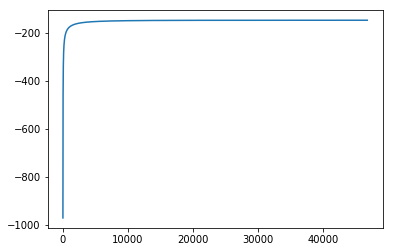

In [17]:
plt.plot(plotx, ploty)
plt.show()